# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

## 
##    Para abordar la temática planteada, considero que será de gran interes para poder predecir el valor de una propiedad, algunos datos tales como :
##    *Ubicación de la propiedad (Ciudad, Barrio)
##    *Cantidad de ambientes
##    *Superficie de la propiedad 
##    *Valuación de otras propiedades en el mercado
    

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [3]:
properati = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')# Cargamos el archivo .CSV a explorar
properati.head()#Leemos las 5 primeras instancias para conocer como se presenta la información

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [4]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
properati.info() # Visualizamos que tipos de datos que tiene nuestro dataset, la cantidad de datos, y el nombre de las columnas
properati.isna().sum() #Visualizamos la cantidad de valores faltantes que hay por columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

## El dataset de Properati contiene 146660 filas, y 19 columnas. 
## Los nombres de las columnas son : 
## 0   start_date       146660 non-null  object 
## 1   end_date         146660 non-null  object 
## 2   created_on       146660 non-null  object 
## 3   lat              136735 non-null  float64
## 4   lon              136701 non-null  float64
## 5   l1               146660 non-null  object 
## 6   l2               146660 non-null  object 
## 7   l3               146660 non-null  object 
## 8   rooms            146660 non-null  float64
## 9   bedrooms         146660 non-null  float64
## 10  bathrooms        140703 non-null  float64
## 11  surface_total    126133 non-null  float64
## 12  surface_covered  125046 non-null  float64
## 13  price            146660 non-null  float64
## 14  currency         146660 non-null  object 
## 15  title            146660 non-null  object 
## 16  description      146660 non-null  object 
## 17  property_type    146660 non-null  object 
## 18  operation_type   146660 non-null  object 

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [5]:
properati['property_type'].unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

## Según este dataset, hay 10 tipos de propiedades publicados, 9 bien definidas y una llamada "Otro"

In [6]:
properati['property_type'].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

## En el dataset, tenemos la siguiente cantidad de propiedades por tipo :
## Departamento       107326
## Casa                21521
## PH                  14298
## Lote                 1312
## Oficina               658
## Otro                  374
## Local comercial       325
## Casa de campo         322
## Depósito              265
## Cochera               259 

## A continuación, en una primera instancia intenté graficar los resultados usando un histograma, y luego me dí cuenta que resultaba más estético y comprensible el uso de countplot

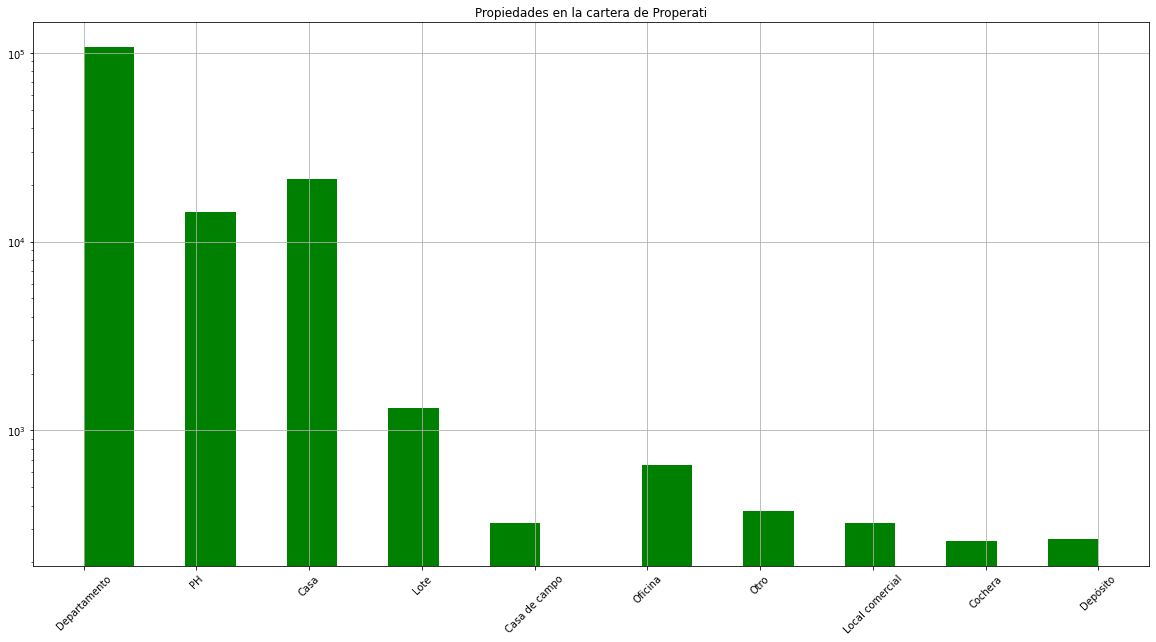

In [28]:
# Se configuran algunos parametros y etiquetas para visualizar de mejor manera el gráfico
plt.figure(figsize=(20,10))
plt.hist(properati['property_type'], bins = 20, color = 'g')
plt.xticks(rotation=45)
plt.grid(True)
plt.yscale('log')
plt.title('Propiedades en la cartera de Properati')
plt.show()

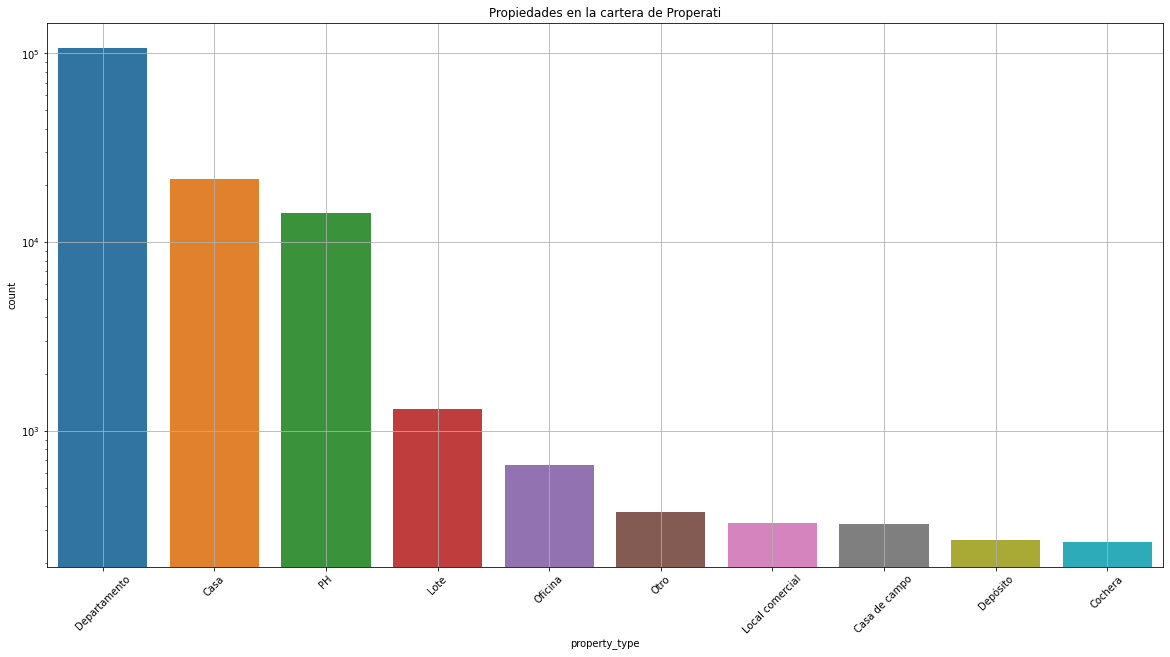

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(data = properati, x = 'property_type', order = properati['property_type'].value_counts().index) #Configuramos el gráfico para que sea impreso en orden descendente 
plt.xticks(rotation=45)
plt.grid(True)
plt.yscale('log') #Configuramos el gráfico para que el eje y este en escala logarítmica, para poder visualizar de manera óptima el gráfico
plt.title('Propiedades en la cartera de Properati')
plt.show()

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [26]:
print(properati['l1'].unique()) # Aquí vemos de que país son las propiedades

['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Bs.As. G.B.A. Zona Norte'
 'Bs.As. G.B.A. Zona Oeste']
Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64
['San Cristobal' 'Boedo' 'Palermo' 'La Plata' 'Villa Crespo'
 'Parque Patricios' 'Villa Pueyrredón' 'Pilar' 'Tigre' 'Abasto' 'Flores'
 'Morón' 'Nuñez' 'Almagro' 'Belgrano' 'Floresta' 'Recoleta' 'Balvanera'
 'Caballito' 'Chacarita' 'San Telmo' 'Colegiales' 'La Matanza'
 'San Isidro' 'San Miguel' 'Villa Luro' 'Barrio Norte' 'Las Cañitas'
 'San Nicolás' 'Villa Urquiza' 'Vicente López' 'Parque Centenario'
 'General San Martín' 'Villa General Mitre' 'Lanús' 'Ituzaingó' 'Boca'
 'Once' 'Retiro' 'Monserrat' 'Avellaneda' 'San Fernando' 'Puerto Madero'
 'Villa Ortuzar' 'Parque Chacabuco' 'Centro / Microcentro'
 'Tres de Febrero' 'Liniers' 'Coghlan' 'Congreso' 'Paternal' 'Saavedra'
 'Villa Santa Rita' 'Barracas' 'Villa Lugano' 'Constitución' 

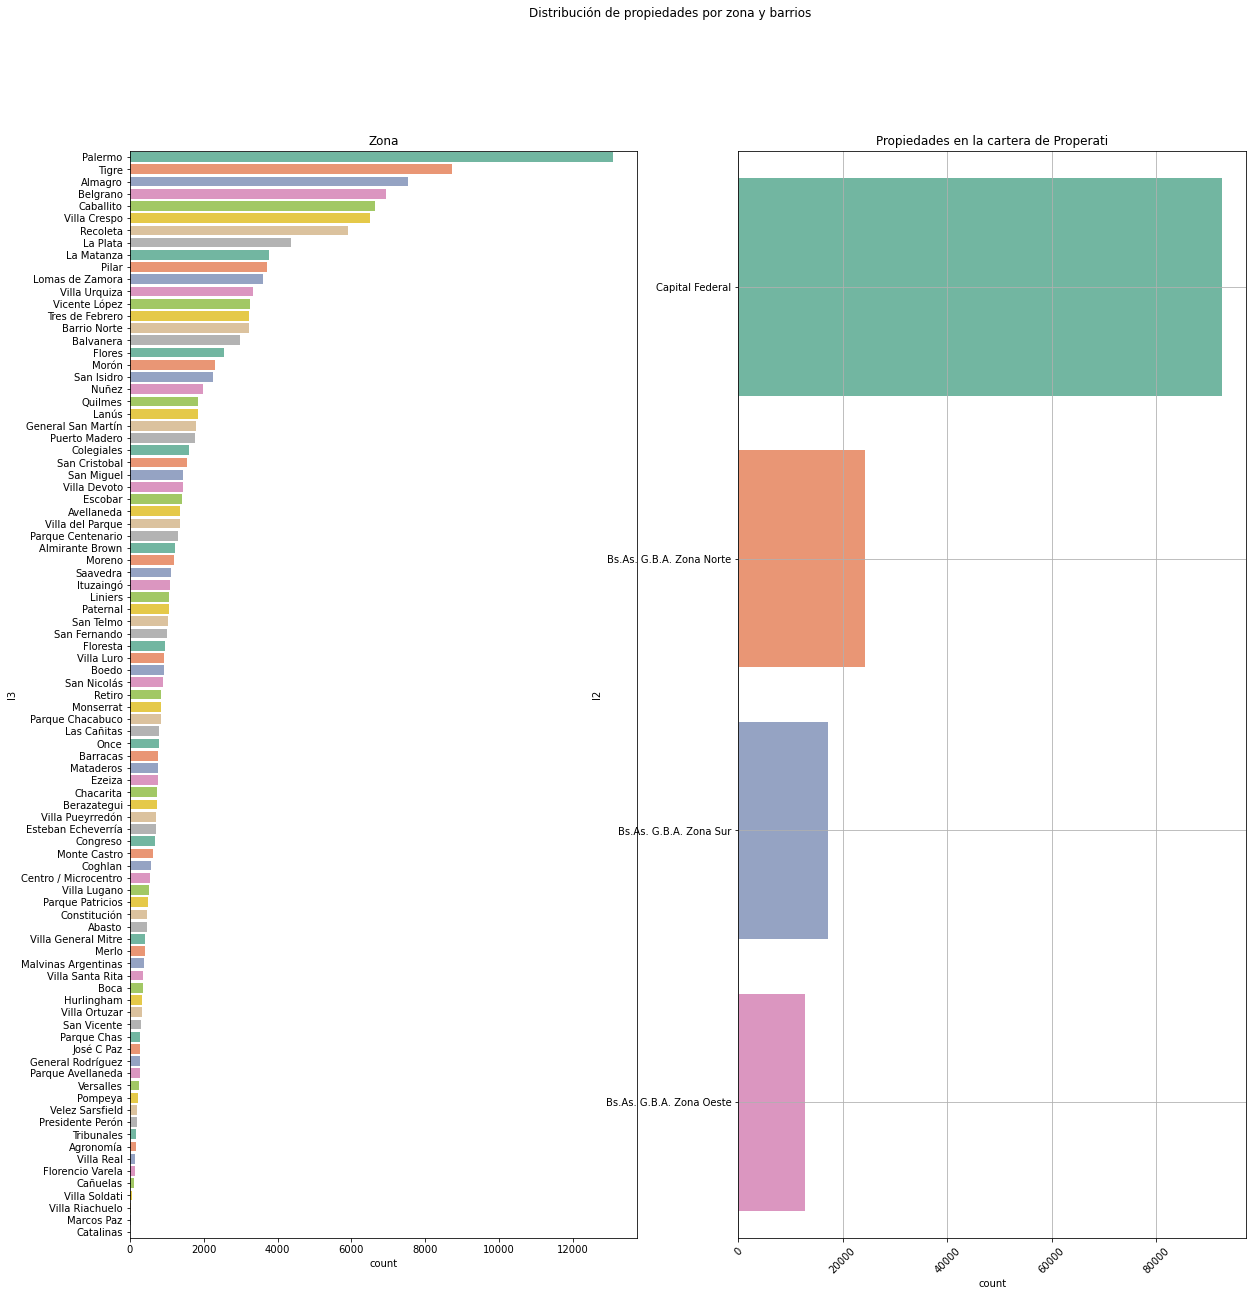

In [34]:
print(properati['l2'].unique()) # Aquí vemos de que región son las propiedades
print(properati['l2'].value_counts())
print(properati['l3'].unique()) # Aquí vemos de que barrio/partido/ciudad son las propiedades
print(properati['l3'].value_counts()) # Mostramos los valores de la cantidad de instancias pertenecientes al mismo barrio 

fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Distribución de propiedades por zona y barrios')

sns.countplot(data = properati, y= 'l2', palette ='Set2',ax = ax[1], order = properati['l2'].value_counts().index ) 
ax[1].set_title('Zona')
sns.countplot(data = properati, y= 'l3', palette ='Set2', ax = ax[0], order = properati['l3'].value_counts().index ) 
ax[0].set_title('Zona')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Propiedades en la cartera de Properati')
plt.show()



## Volvemos a visualizar el gráfico de distribución de propiedades según el barrio en el que se encuentra, con una configuración óptima para poder tener más detalle.

['San Cristobal' 'Boedo' 'Palermo' 'La Plata' 'Villa Crespo'
 'Parque Patricios' 'Villa Pueyrredón' 'Pilar' 'Tigre' 'Abasto' 'Flores'
 'Morón' 'Nuñez' 'Almagro' 'Belgrano' 'Floresta' 'Recoleta' 'Balvanera'
 'Caballito' 'Chacarita' 'San Telmo' 'Colegiales' 'La Matanza'
 'San Isidro' 'San Miguel' 'Villa Luro' 'Barrio Norte' 'Las Cañitas'
 'San Nicolás' 'Villa Urquiza' 'Vicente López' 'Parque Centenario'
 'General San Martín' 'Villa General Mitre' 'Lanús' 'Ituzaingó' 'Boca'
 'Once' 'Retiro' 'Monserrat' 'Avellaneda' 'San Fernando' 'Puerto Madero'
 'Villa Ortuzar' 'Parque Chacabuco' 'Centro / Microcentro'
 'Tres de Febrero' 'Liniers' 'Coghlan' 'Congreso' 'Paternal' 'Saavedra'
 'Villa Santa Rita' 'Barracas' 'Villa Lugano' 'Constitución' 'Mataderos'
 'Villa Devoto' 'Parque Avellaneda' 'Villa del Parque'
 'Esteban Echeverría' 'Lomas de Zamora' 'Almirante Brown' 'Ezeiza'
 'San Vicente' 'Berazategui' 'Quilmes' 'Malvinas Argentinas' 'José C Paz'
 'Escobar' 'Moreno' 'General Rodríguez' 'Monte Cast

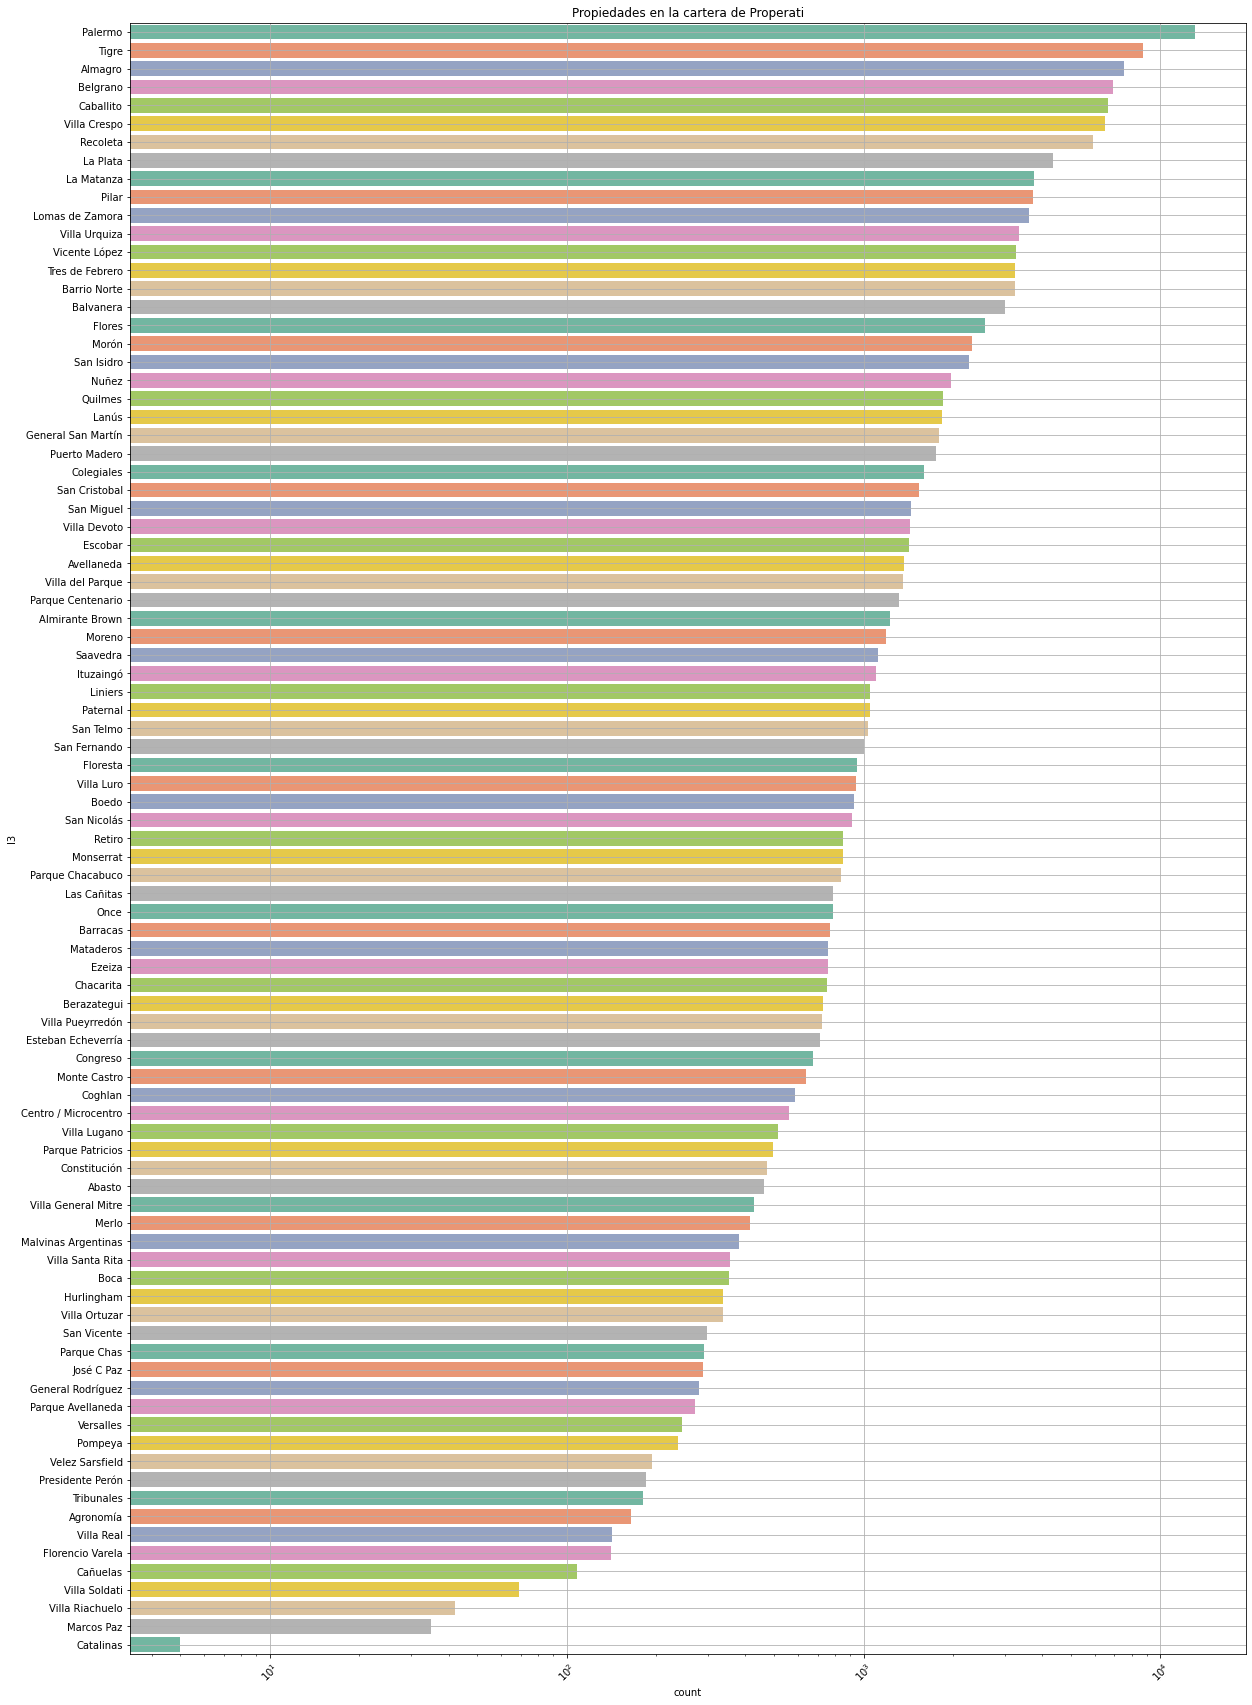

In [37]:
print(properati['l3'].unique()) # Aquí vemos de que barrio/partido/ciudad son las propiedades
print(properati['l3'].value_counts()) # Mostramos los valores de la cantidad de instancias pertenecientes al mismo barrio 
plt.figure(figsize=(20,30))
sns.countplot(data = properati, y= 'l3', palette ='Set2', order = properati['l3'].value_counts().index) 
plt.xticks(rotation=45)
plt.grid(True)
plt.xscale('log') #Configuramos el gráfico para que el eje y este en escala logarítmica, para poder visualizar de manera óptima el gráfico
plt.title('Propiedades en la cartera de Properati')
plt.show() # Mostramos de manera gráfica la cantidad de instancias pertenecientes al mismo barrio

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

## Las 3 clases mas abundantes de propiedades son: 
## Departamento       107326
## Casa                21521
## PH                  14298

## Y la región es Capital Federal

In [38]:
dfAb = properati[(properati.l2 == "Capital Federal")  & ((properati.property_type == "Departamento") | (properati.property_type == "Casa") | (properati.property_type == "PH"))] # Filtramos las instancias que cumplen con ser las 3 clases más abundantes respecto al tipo de propiedad, en la región con mayor cantidad de propiedades publicadas
dfAb.shape
dfAb.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [39]:
properati.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


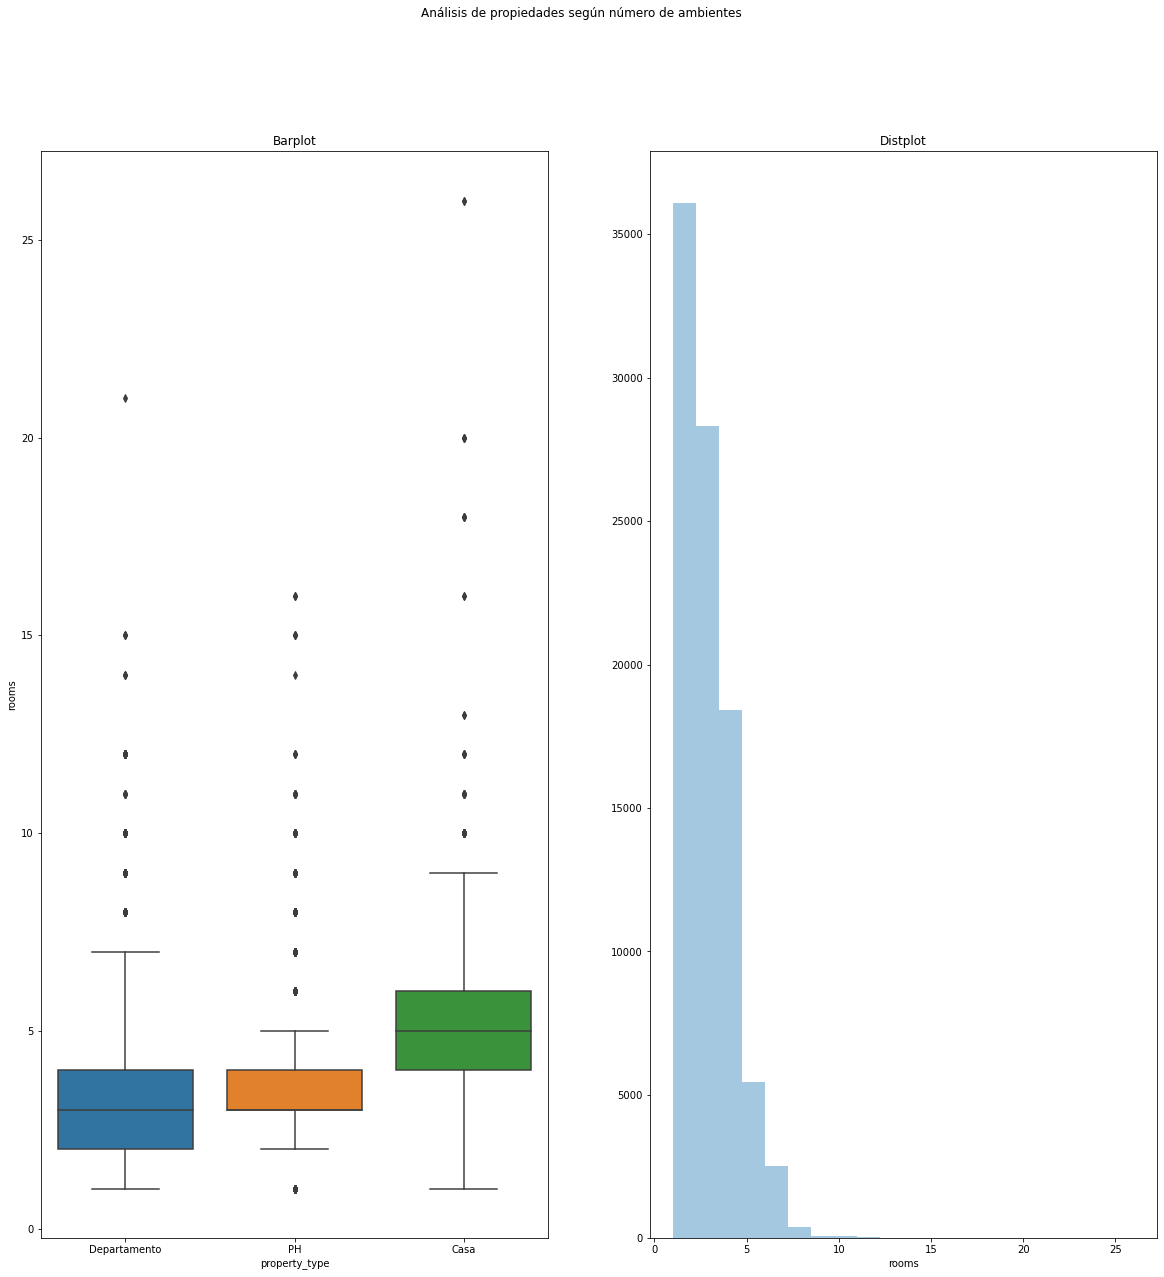

In [51]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de ambientes')

sns.distplot(dfAb['rooms'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
dfAb['rooms'].value_counts(normalize=True)
sns.boxplot(data = dfAb, y = "rooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Superficie Total')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()


## Analizando los gráficos que se encuentran en la parte superior, vemos que a la hora de filtrar el dataset, debemos distinguir entre los tipos de propiedades, ya que caso contrario, se estarían quitando datos significativos para un tipo de propiedad o se estarían inclyendo datos insignificantes para otras. 


## Podemos observar que los bigotes de las cajas estan en propiedades con menos de 10 ambientes

C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


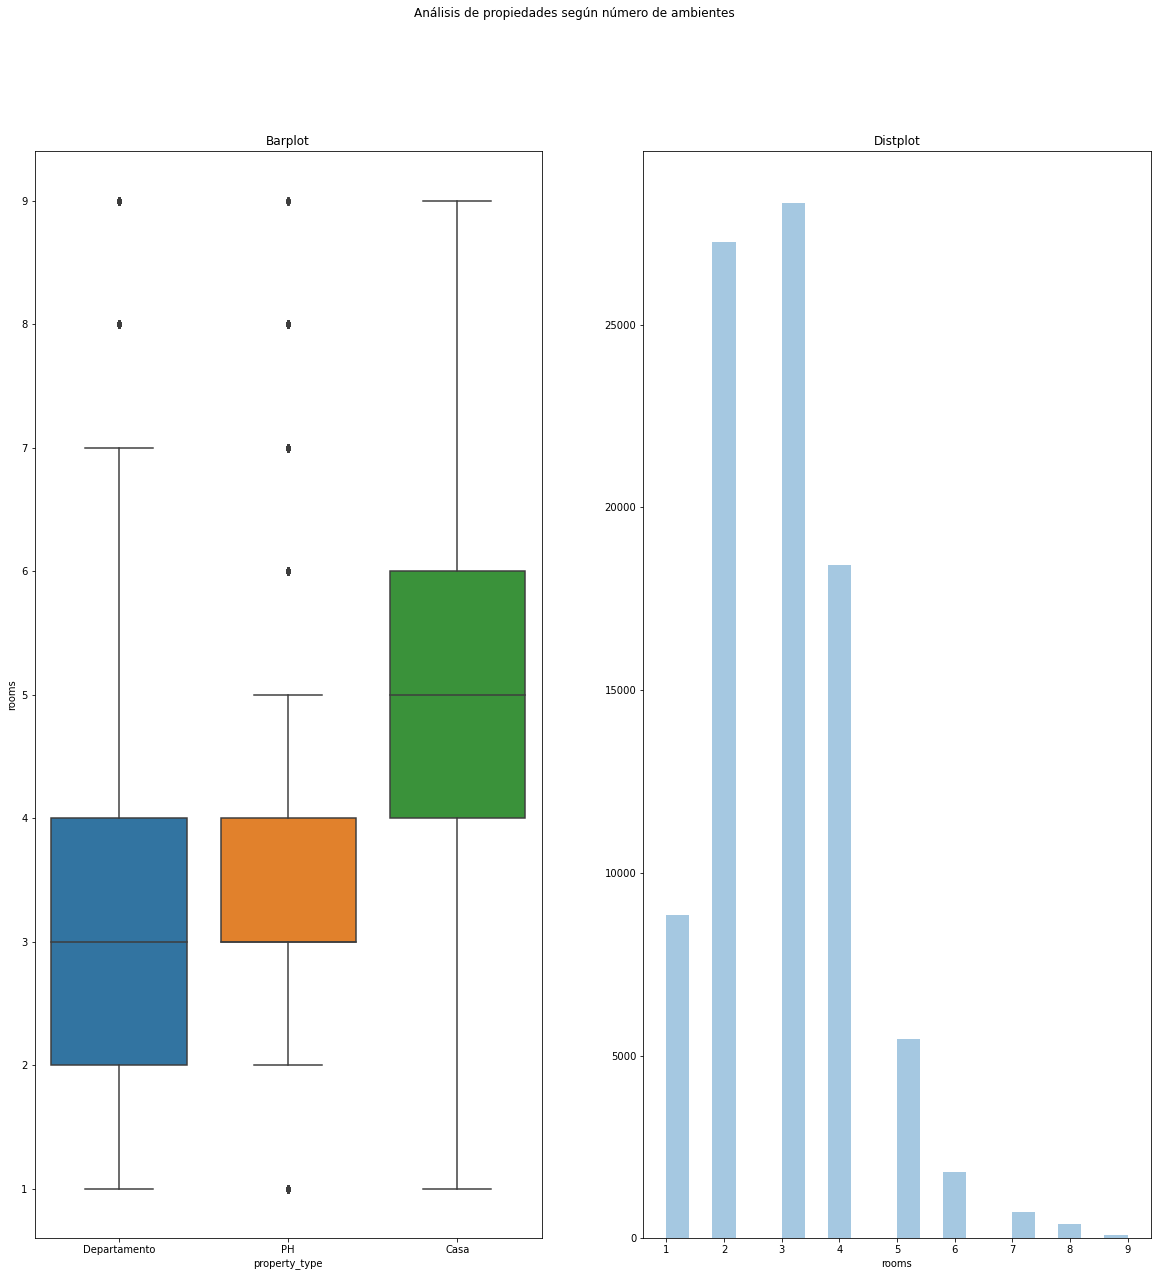

In [56]:
df_filtro_rooms = dfAb[(dfAb.rooms < 10)]
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de ambientes')

sns.distplot(df_filtro_rooms['rooms'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
df_filtro_rooms['rooms'].value_counts(normalize=True)
sns.boxplot(data = df_filtro_rooms, y = "rooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Superficie Total')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

In [57]:
df_filtro_rooms = df_filtro_rooms[(df_filtro_rooms.property_type == 'Casa') | ((df_filtro_rooms.property_type == 'PH') & (df_filtro_rooms.rooms <6) & (df_filtro_rooms.rooms > 1)) | ((df_filtro_rooms.property_type == 'Departamento') & (df_filtro_rooms.rooms < 8))]

C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


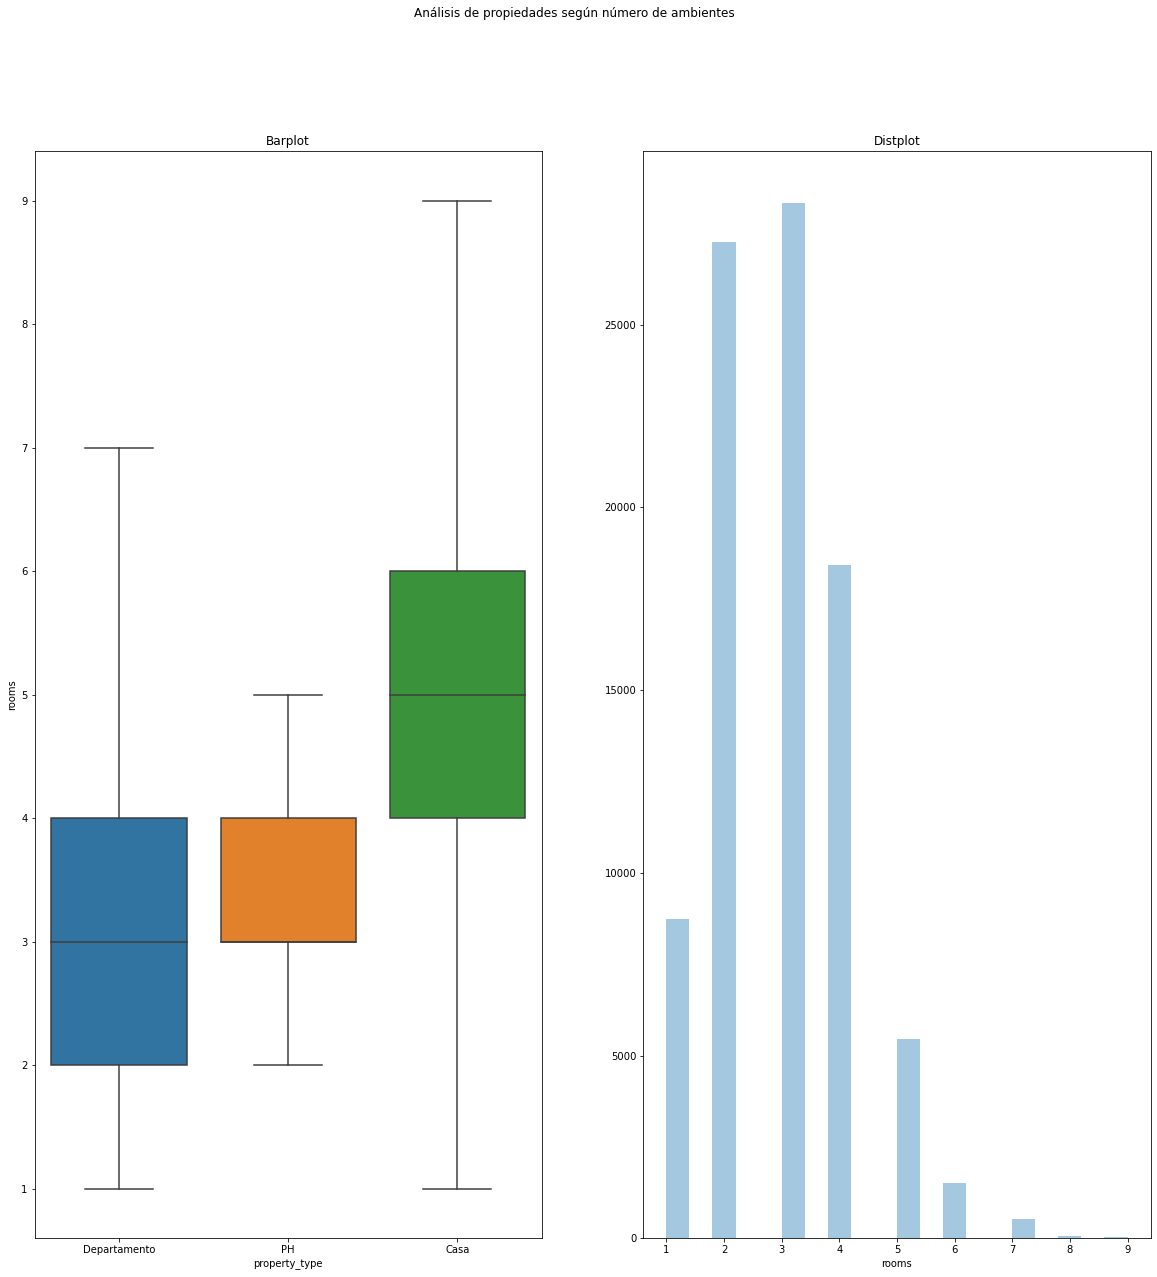

In [58]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de ambientes')

sns.distplot(df_filtro_rooms['rooms'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
df_filtro_rooms['rooms'].value_counts(normalize=True)
sns.boxplot(data = df_filtro_rooms, y = "rooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Superficie Total')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

## Graficamente se puede observar que se há logrado un buen filtrado de las propiedades usando el parametro "Rooms" en esta primer etapa

## Lo que vamos a verificar es que no exista inconsistencia en que el número de habitaciones sea mayor al numero de ambientes de una casa.

In [60]:
df_filtro_rooms_corregida = df_filtro_rooms[(df_filtro_rooms.rooms >= df_filtro_rooms.bedrooms)] # Filtramos todas las instancias que tiene inconsistencia de habitaciones
df_filtro_rooms_corregida.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90289 entries, 0 to 146558
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_date       90289 non-null  object 
 1   end_date         90289 non-null  object 
 2   created_on       90289 non-null  object 
 3   lat              85810 non-null  float64
 4   lon              85796 non-null  float64
 5   l1               90289 non-null  object 
 6   l2               90289 non-null  object 
 7   l3               90289 non-null  object 
 8   rooms            90289 non-null  float64
 9   bedrooms         90289 non-null  float64
 10  bathrooms        88131 non-null  float64
 11  surface_total    81380 non-null  float64
 12  surface_covered  81064 non-null  float64
 13  price            90289 non-null  float64
 14  currency         90289 non-null  object 
 15  title            90289 non-null  object 
 16  description      90289 non-null  object 
 17  property_ty

C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


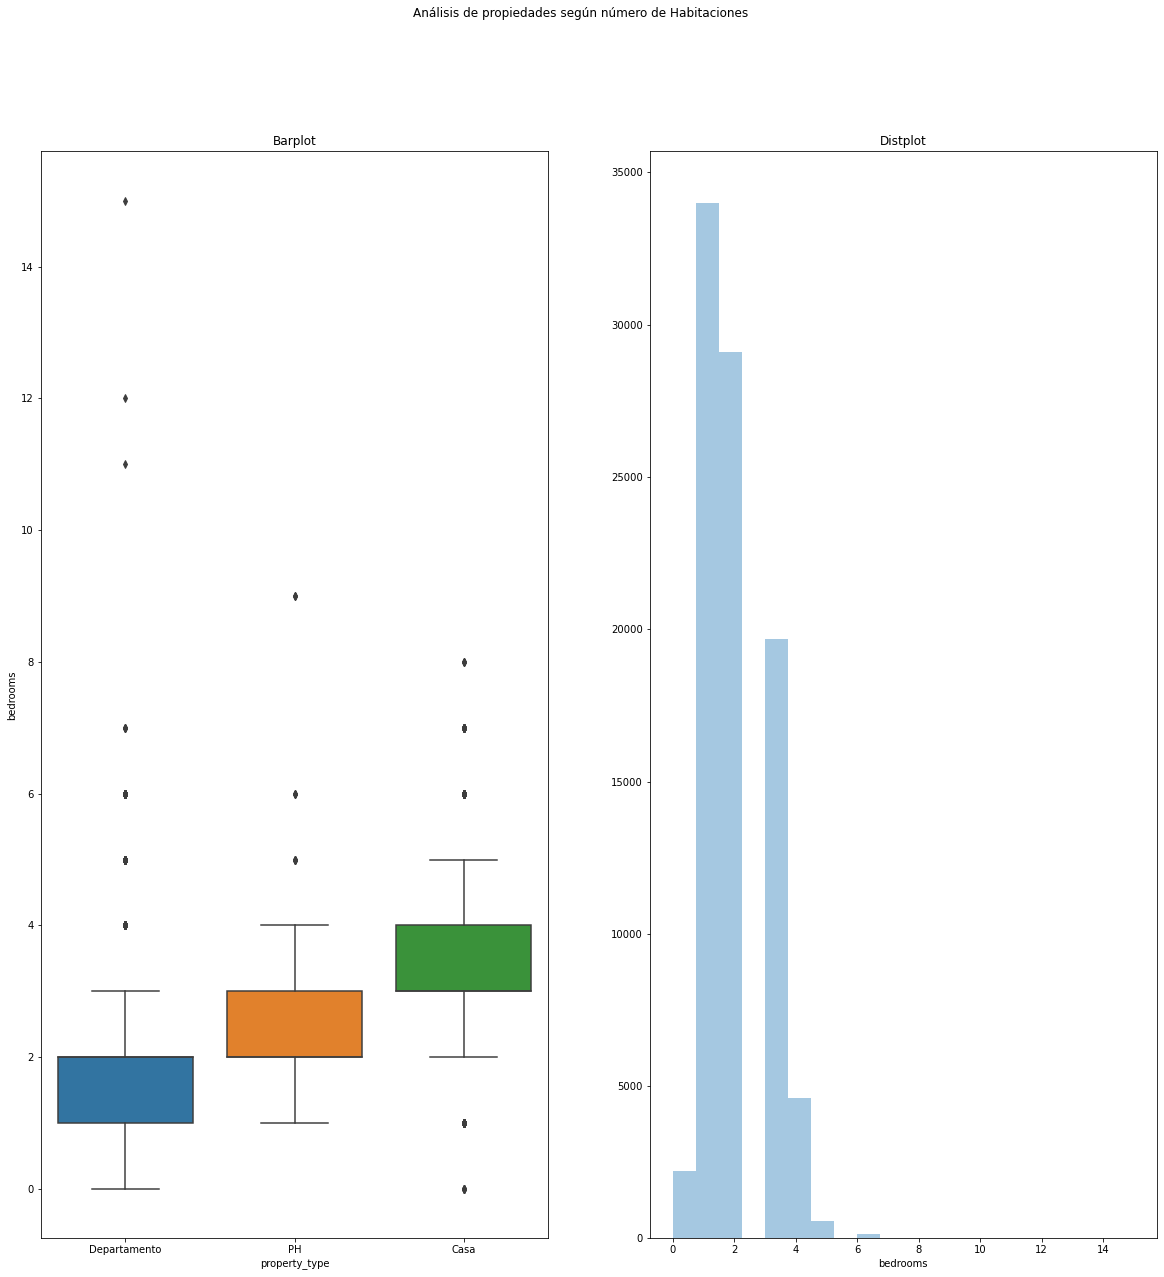

In [61]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de Habitaciones')

sns.distplot(df_filtro_rooms['bedrooms'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
df_filtro_rooms['bedrooms'].value_counts(normalize=True)
sns.boxplot(data = df_filtro_rooms, y = "bedrooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Superficie Total')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

## Repetimos un proceso similar al implementado para los ambientes 

In [64]:
df_filtro_bedrooms = df_filtro_rooms[((df_filtro_rooms.property_type == 'Casa') & (df_filtro_rooms.bedrooms <6) & (df_filtro_rooms.bedrooms > 1)) | ((df_filtro_rooms.property_type == 'PH') & (df_filtro_rooms.bedrooms <5)) | ((df_filtro_rooms.property_type == 'Departamento') & (df_filtro_rooms.bedrooms < 4))]

C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


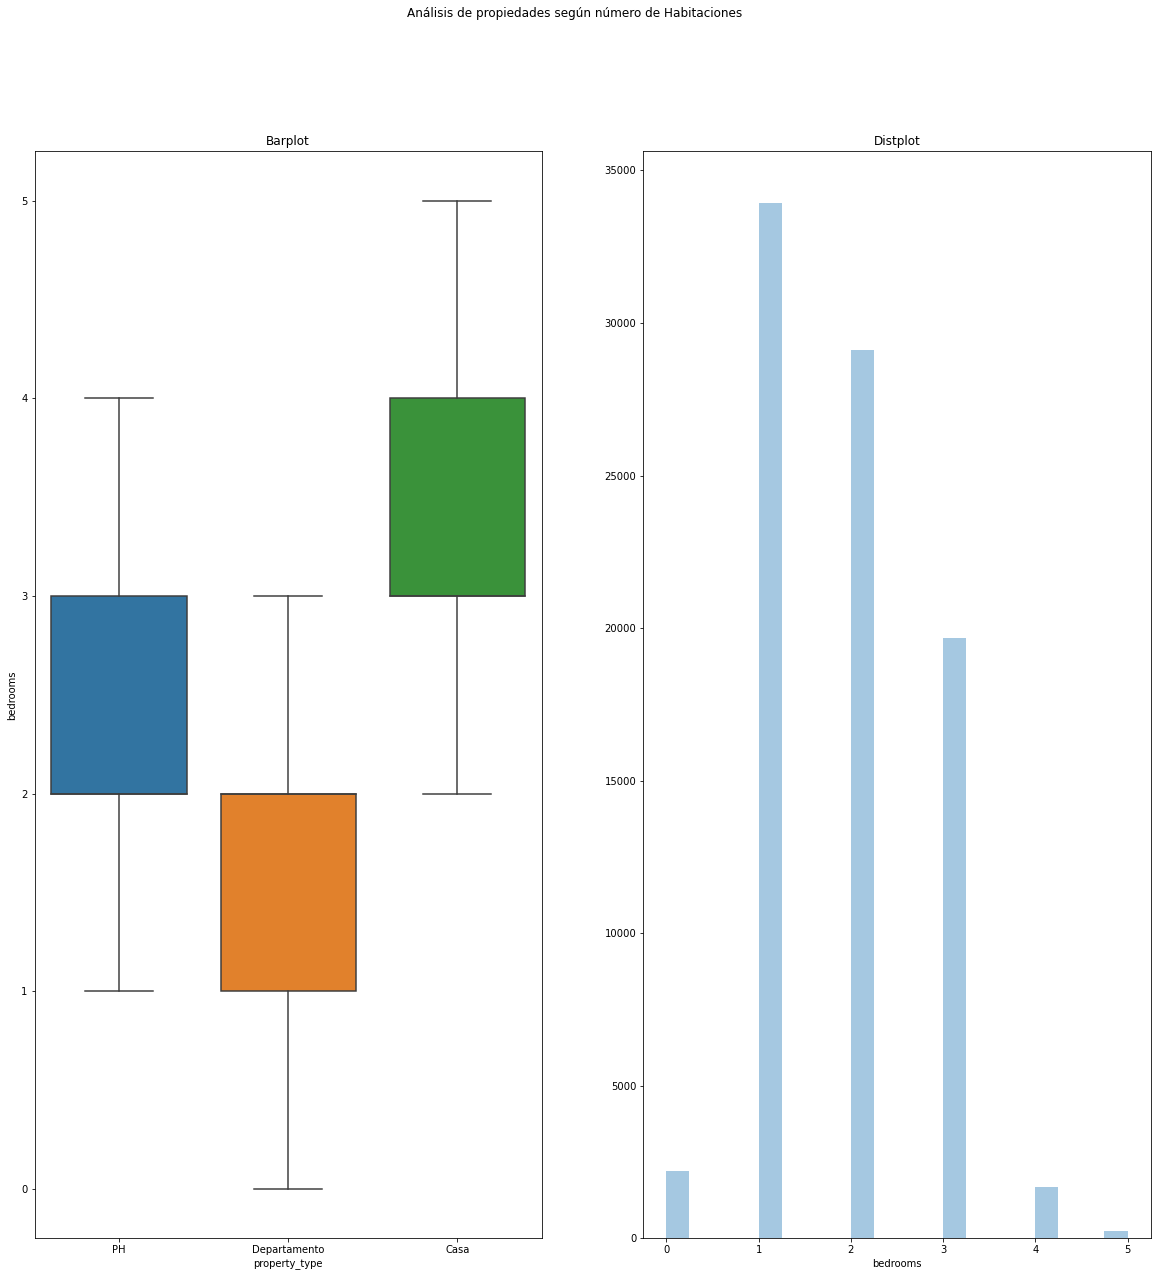

In [74]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de Habitaciones')

sns.distplot(df_filtro_bedrooms['bedrooms'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
df_filtro_bedrooms['bedrooms'].value_counts(normalize=True)
sns.boxplot(data = df_filtro_bedrooms, y = "bedrooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Habitaciones')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

## Repetimos un proceso similar al implementado para los baños

C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


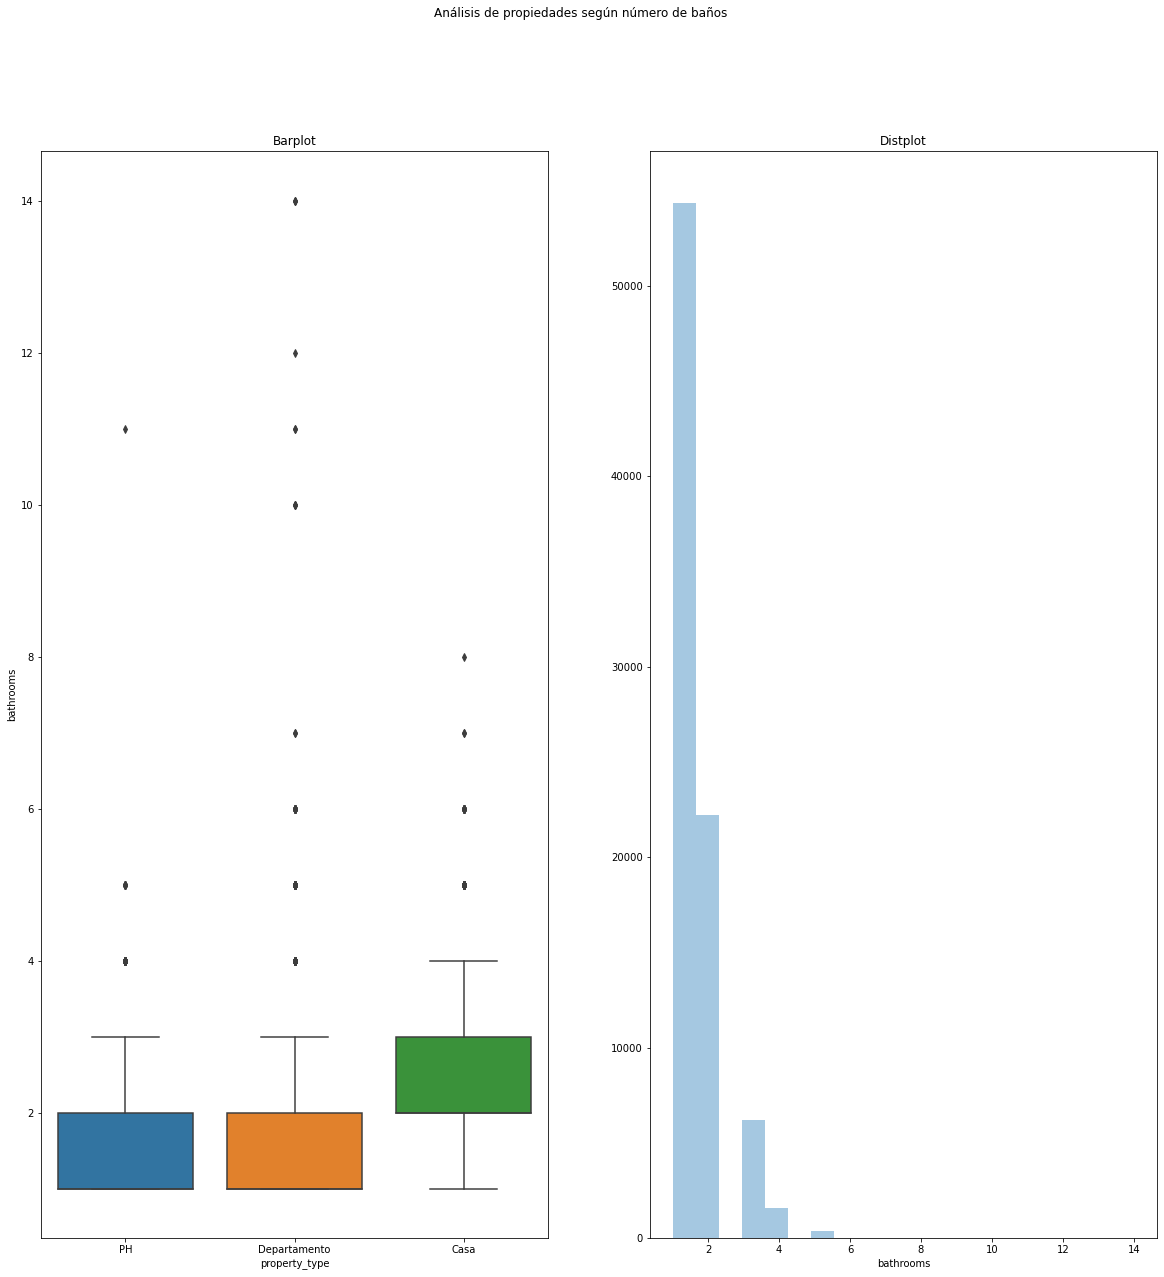

In [73]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de baños')

sns.distplot(df_filtro_bedrooms['bathrooms'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
df_filtro_bedrooms['bathrooms'].value_counts(normalize=True)
sns.boxplot(data = df_filtro_bedrooms, y = "bathrooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Baños')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

##Analizando los gráficos e información anterior, podemos ver que en su mayoría, las propiedades del tipo Casa tienen máximo 4 baños, PH 3 baños y Departamento 3 baños

In [85]:
df_filtro_bathrooms = df_filtro_bedrooms[((df_filtro_bedrooms.property_type == 'Casa') & (df_filtro_rooms.bathrooms <5)) | ((df_filtro_bedrooms.property_type == 'PH') & (df_filtro_rooms.bathrooms <4)) | ((df_filtro_bedrooms.property_type == 'Departamento') & (df_filtro_bedrooms.bathrooms < 4))]

<ipython-input-85-776245a423e6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtro_bathrooms = df_filtro_bedrooms[((df_filtro_bedrooms.property_type == 'Casa') & (df_filtro_rooms.bathrooms <5)) | ((df_filtro_bedrooms.property_type == 'PH') & (df_filtro_rooms.bathrooms <4)) | ((df_filtro_bedrooms.property_type == 'Departamento') & (df_filtro_bedrooms.bathrooms < 4))]


C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


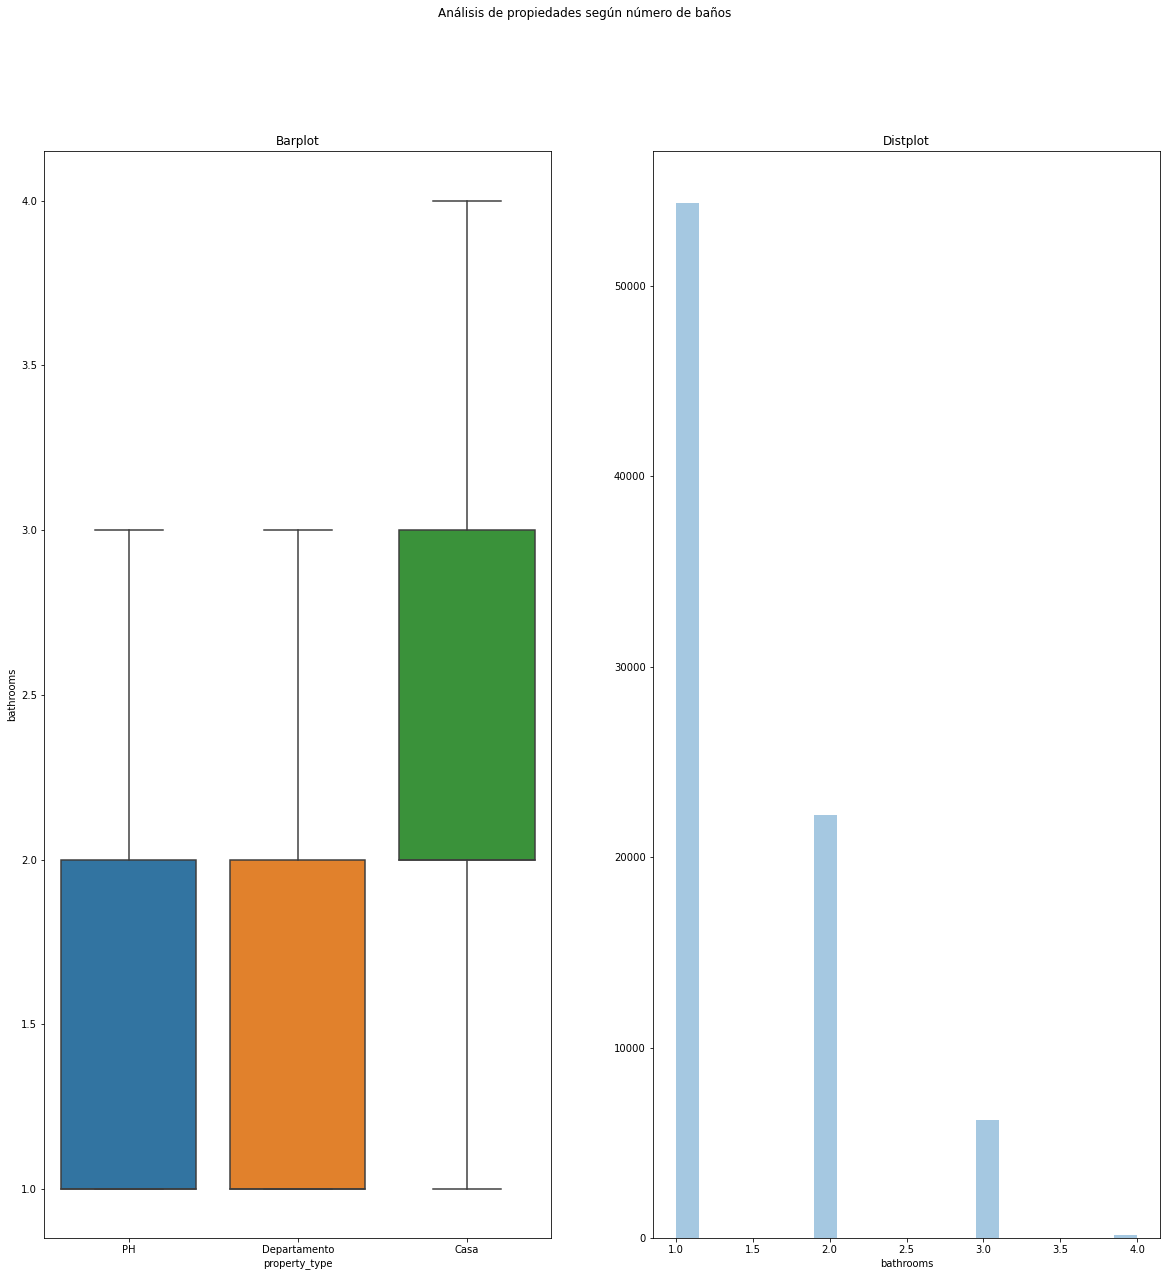

In [86]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de baños')

sns.distplot(df_filtro_bathrooms['bathrooms'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
df_filtro_bathrooms['bathrooms'].value_counts(normalize=True)
sns.boxplot(data = df_filtro_bathrooms, y = "bathrooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Baños')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


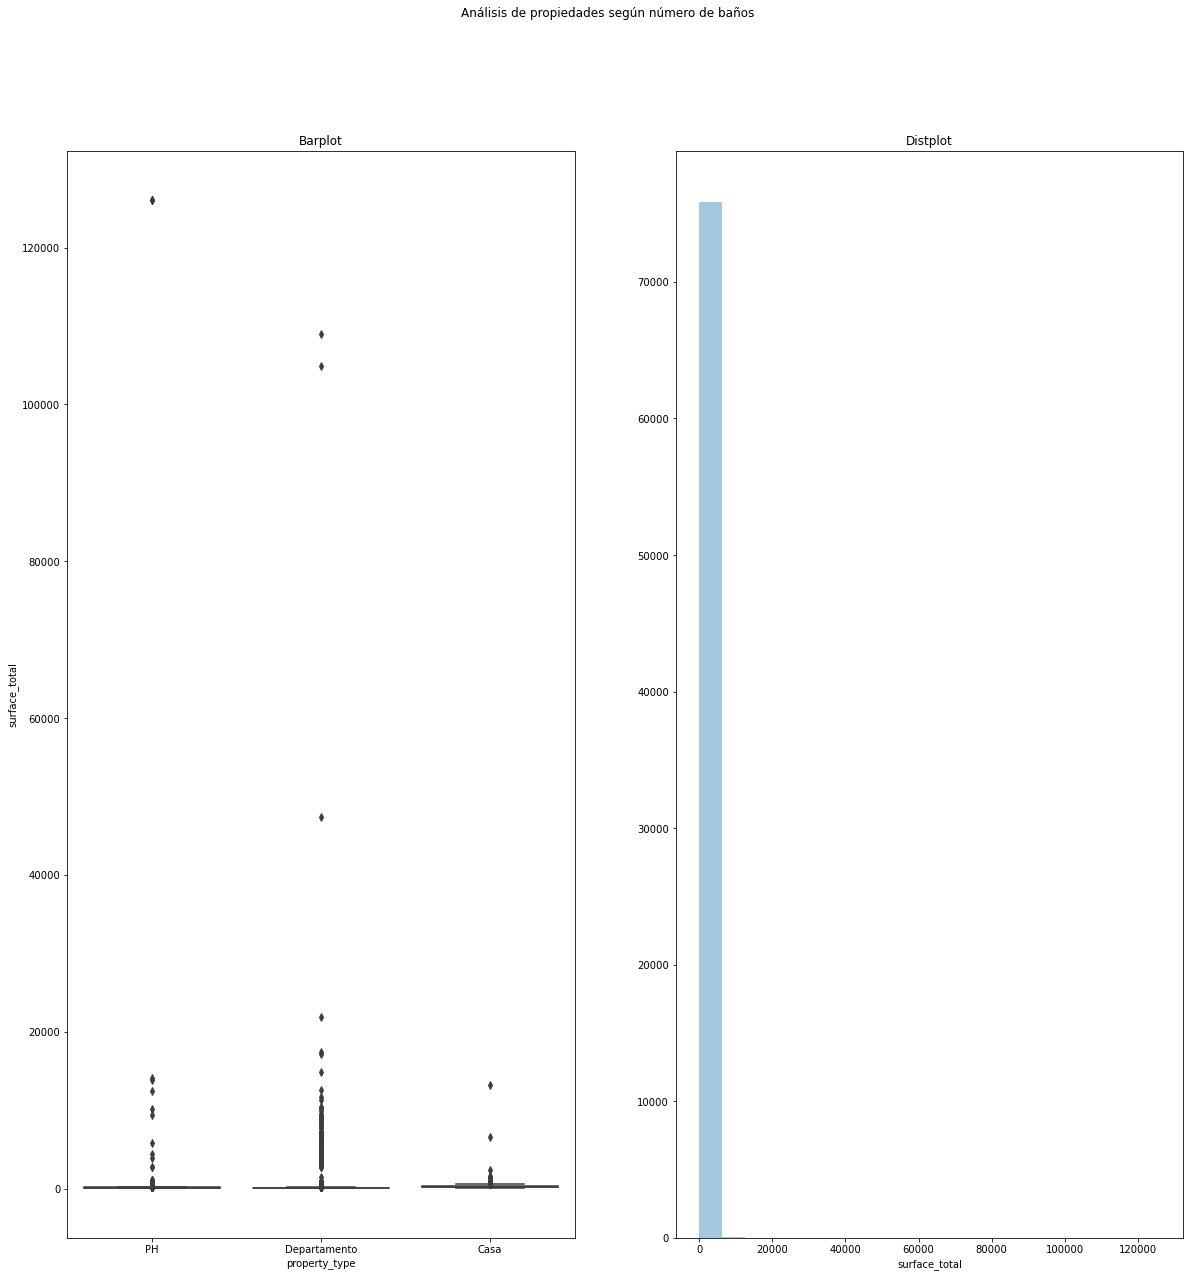

In [87]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de baños')

sns.distplot(df_filtro_bathrooms['surface_total'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
df_filtro_bathrooms['surface_total'].value_counts(normalize=True)
sns.boxplot(data = df_filtro_bathrooms, y = "surface_total", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Superficie Total')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

## Realizamos un filtrado de aquellas propiedades que tienen una superficie cubierta que la superficie total, ya que se ve cierta inconsistencia

In [88]:
df_filtro_bathrooms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82956 entries, 1 to 146557
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_date       82956 non-null  object 
 1   end_date         82956 non-null  object 
 2   created_on       82956 non-null  object 
 3   lat              79070 non-null  float64
 4   lon              79058 non-null  float64
 5   l1               82956 non-null  object 
 6   l2               82956 non-null  object 
 7   l3               82956 non-null  object 
 8   rooms            82956 non-null  float64
 9   bedrooms         82956 non-null  float64
 10  bathrooms        82956 non-null  float64
 11  surface_total    75864 non-null  float64
 12  surface_covered  75609 non-null  float64
 13  price            82956 non-null  float64
 14  currency         82956 non-null  object 
 15  title            82956 non-null  object 
 16  description      82956 non-null  object 
 17  property_ty

In [89]:
df_filtro_bathrooms =   df_filtro_bathrooms[ (df_filtro_bathrooms.surface_total >= df_filtro_bathrooms.surface_covered)]

In [90]:
df_filtro_bathrooms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74721 entries, 1 to 146557
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_date       74721 non-null  object 
 1   end_date         74721 non-null  object 
 2   created_on       74721 non-null  object 
 3   lat              71040 non-null  float64
 4   lon              71040 non-null  float64
 5   l1               74721 non-null  object 
 6   l2               74721 non-null  object 
 7   l3               74721 non-null  object 
 8   rooms            74721 non-null  float64
 9   bedrooms         74721 non-null  float64
 10  bathrooms        74721 non-null  float64
 11  surface_total    74721 non-null  float64
 12  surface_covered  74721 non-null  float64
 13  price            74721 non-null  float64
 14  currency         74721 non-null  object 
 15  title            74721 non-null  object 
 16  description      74721 non-null  object 
 17  property_ty

## Ahora que ya hemos limpiado esos valores incoherentes, continuamos analizando la superficie total

In [96]:
df_filtro_surface_total = df_filtro_bathrooms[(df_filtro_bathrooms.surface_total < 20000)]

C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


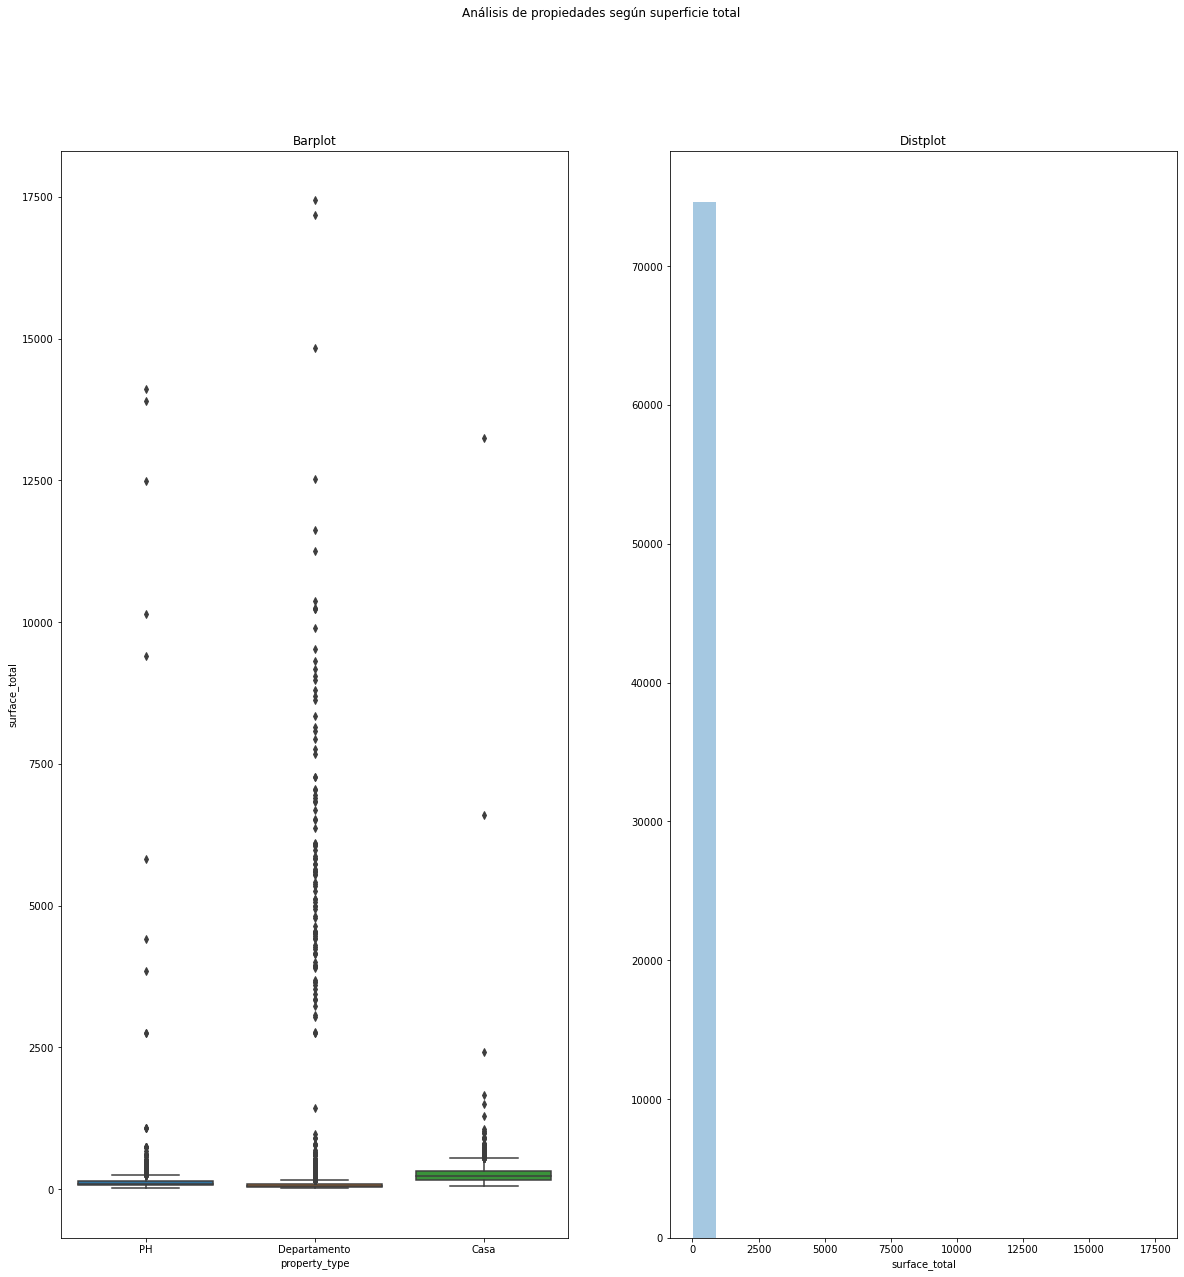

In [97]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según superficie total')

sns.distplot(df_filtro_surface_total['surface_total'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
df_filtro_surface_total['surface_total'].value_counts(normalize=True)
sns.boxplot(data = df_filtro_surface_total, y = "surface_total", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Superficie Total')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

In [103]:
df_filtro_surface_total = df_filtro_surface_total[(df_filtro_surface_total.surface_total < 1000)]

C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


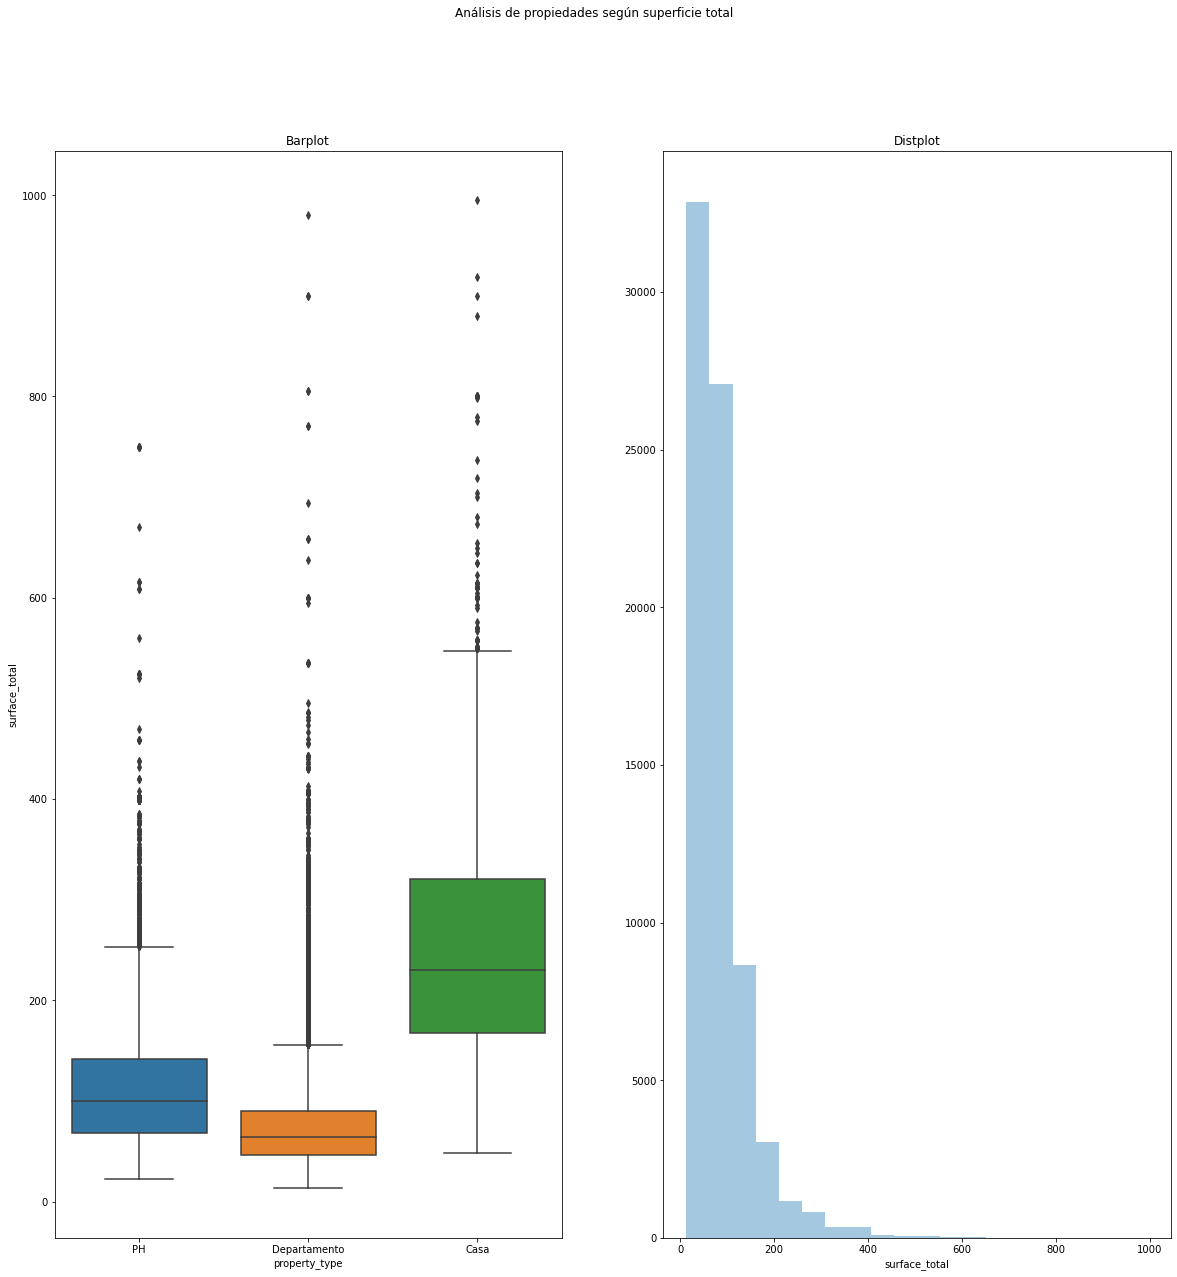

In [104]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según superficie total')

sns.distplot(df_filtro_surface_total['surface_total'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
df_filtro_surface_total['surface_total'].value_counts(normalize=True)
sns.boxplot(data = df_filtro_surface_total, y = "surface_total", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Superficie Total')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

In [107]:
df_filtro_surface_total = df_filtro_surface_total[ (((df_filtro_surface_total.property_type == 'Casa') & (df_filtro_surface_total.surface_total < 600))| ((df_filtro_surface_total.property_type == 'PH') & (df_filtro_surface_total.surface_total < 300))| ((df_filtro_surface_total.property_type == 'Departamento') & (df_filtro_surface_total.surface_total < 200)) ) ]

C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


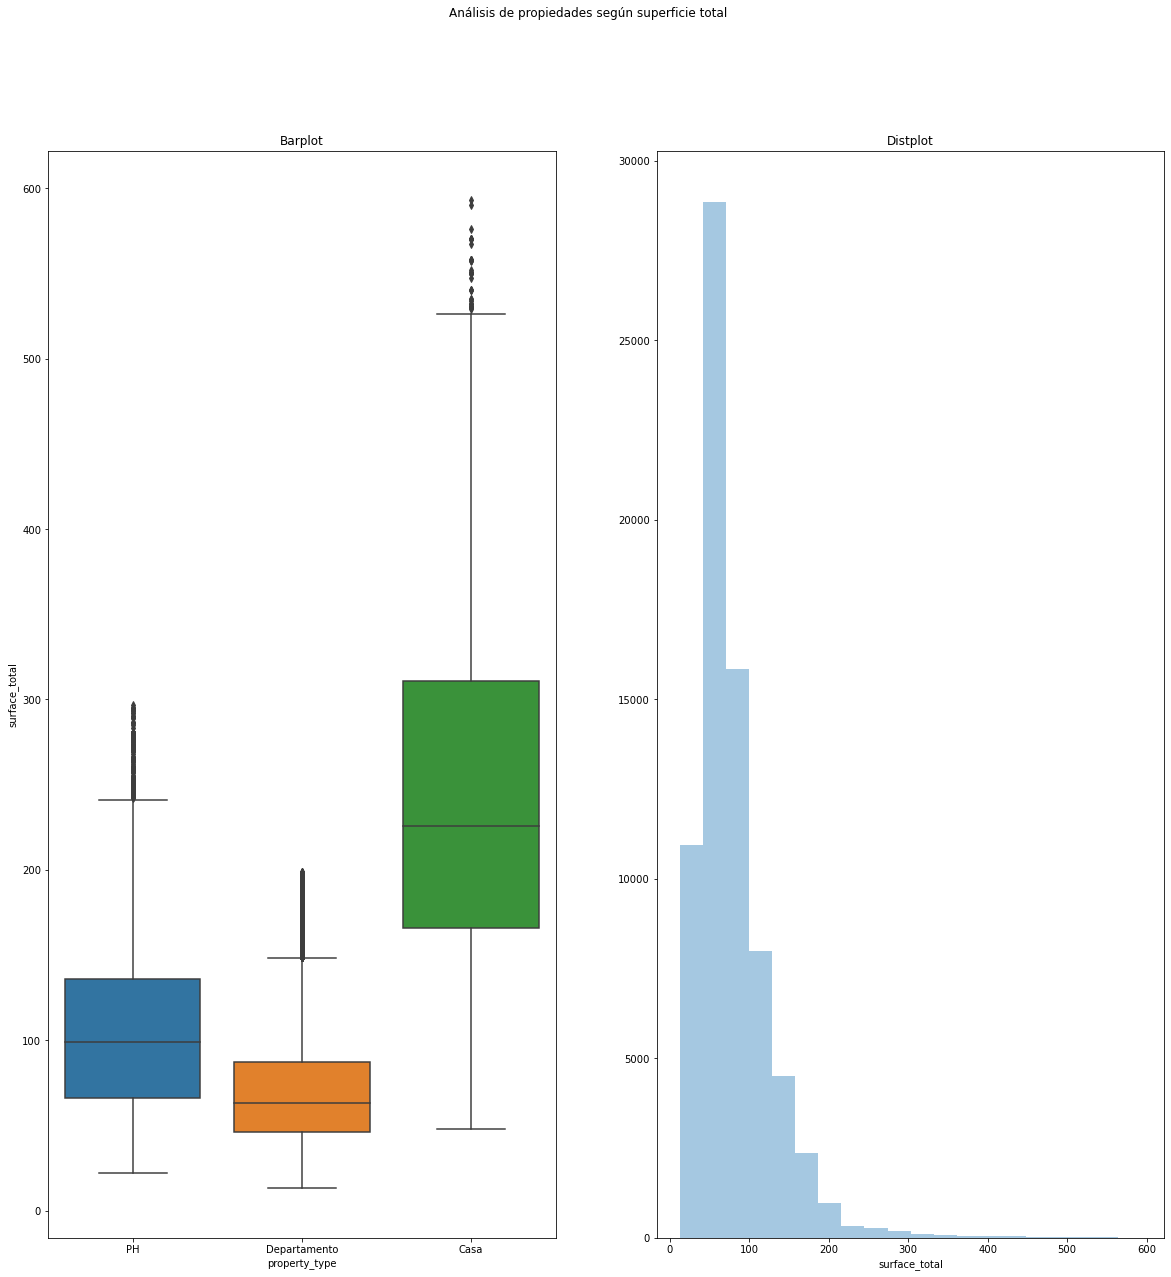

In [108]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según superficie total')

sns.distplot(df_filtro_surface_total['surface_total'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
df_filtro_surface_total['surface_total'].value_counts(normalize=True)
sns.boxplot(data = df_filtro_surface_total, y = "surface_total", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Superficie Total')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

In [109]:
df_filtro_surface_total = df_filtro_surface_total[ (((df_filtro_surface_total.property_type == 'Casa') & (df_filtro_surface_total.surface_total < 540))| ((df_filtro_surface_total.property_type == 'PH') & (df_filtro_surface_total.surface_total < 250))| ((df_filtro_surface_total.property_type == 'Departamento') & (df_filtro_surface_total.surface_total < 150)) ) ]

C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


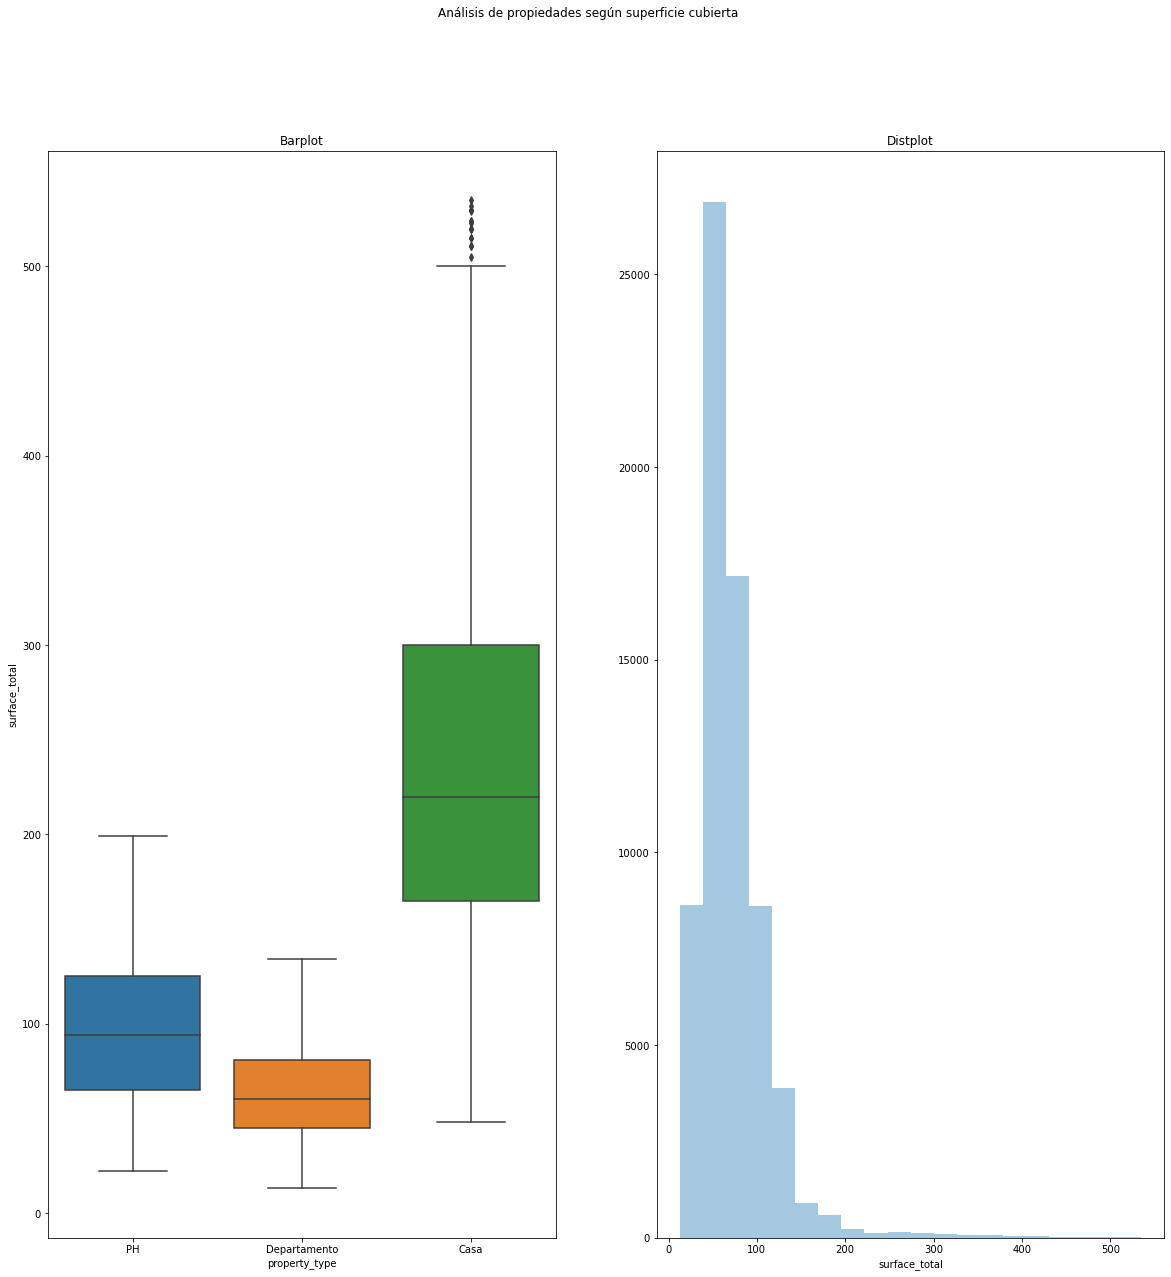

In [117]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según superficie cubierta')

sns.distplot(df_filtro_surface_total['surface_total'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
df_filtro_surface_total['surface_total'].value_counts(normalize=True)
sns.boxplot(data = df_filtro_surface_total, y = "surface_total", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Superficie Total')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

## En este punto consideramos que el dataset se ha depurado de manera satisfactoria tomando en cuenta su superficie total. Ahora veremos que sucede con la superficie cubierta

In [114]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según superficie total')

sns.distplot(df_filtro_surface_total['surface_covered'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
df_filtro_surface_total['surface_covered'].value_counts(normalize=True)
sns.boxplot(data = df_filtro_surface_total, y = "surface_covered", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Superficie cubierta')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

In [119]:
df_filtro_surface_covered = df_filtro_surface_total[ (((df_filtro_surface_total.property_type == 'Casa') & (df_filtro_surface_total.surface_covered < 400))| ((df_filtro_surface_total.property_type == 'PH') & (df_filtro_surface_total.surface_total < 200))| ((df_filtro_surface_total.property_type == 'Departamento') & (df_filtro_surface_total.surface_total < 135)) ) ]

C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


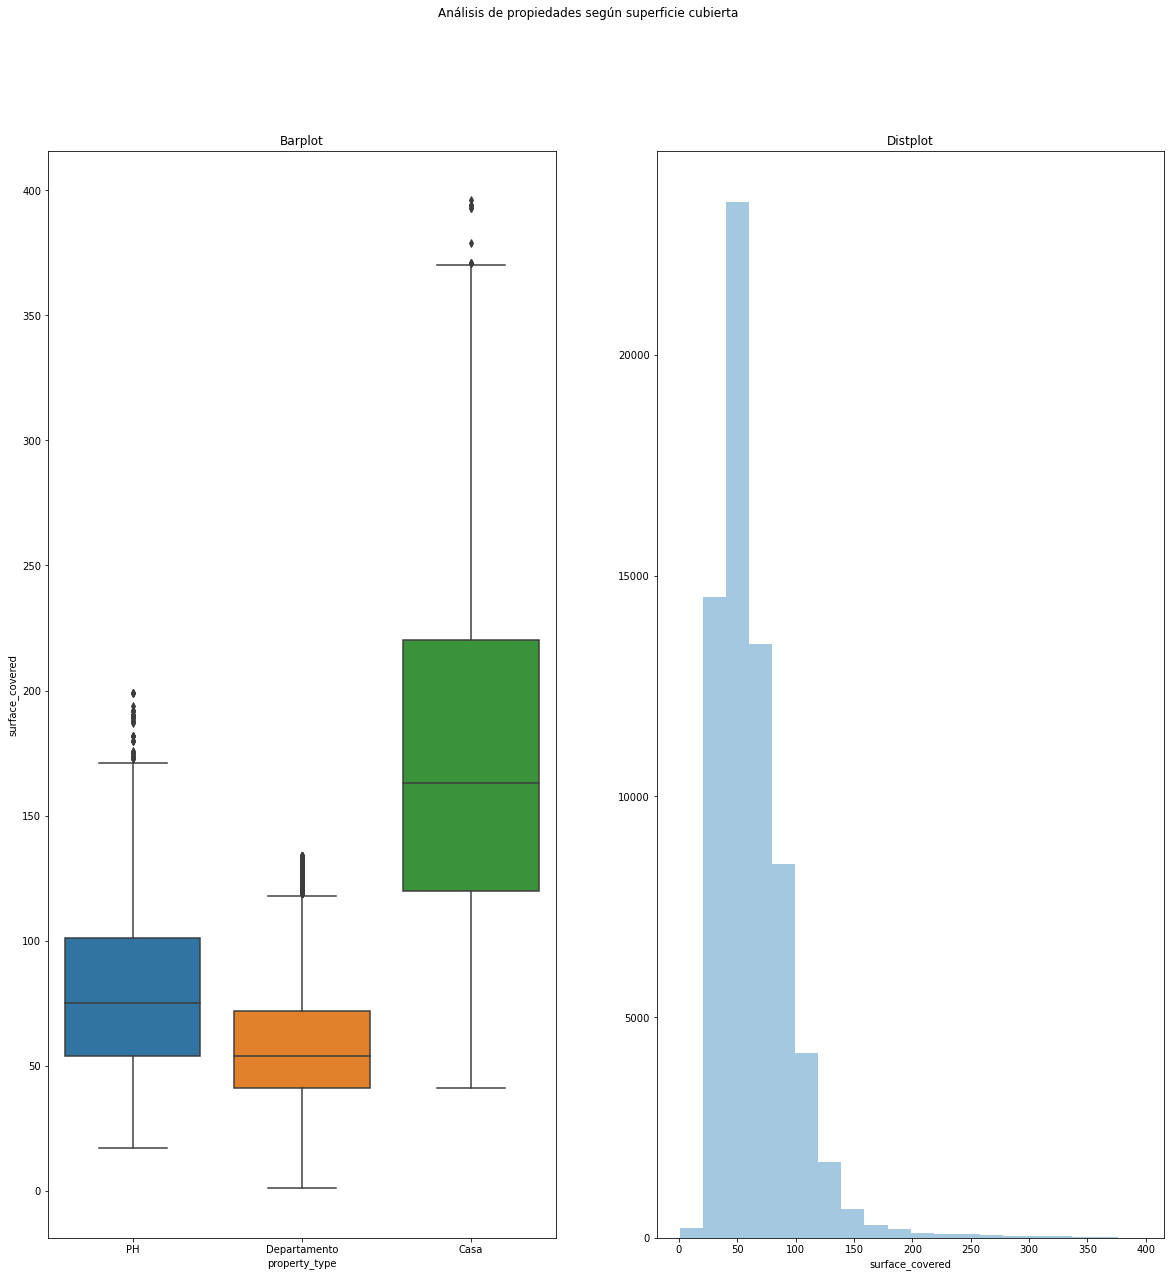

In [121]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según superficie cubierta')

sns.distplot(df_filtro_surface_covered['surface_covered'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
df_filtro_surface_covered['surface_covered'].value_counts(normalize=True)
sns.boxplot(data = df_filtro_surface_covered, y = "surface_covered", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Superficie cubierta')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

In [122]:
df_filtro_surface_covered = df_filtro_surface_total[ (((df_filtro_surface_total.property_type == 'Casa') & (df_filtro_surface_total.surface_covered < 360))| ((df_filtro_surface_total.property_type == 'PH') & (df_filtro_surface_total.surface_total < 170))| ((df_filtro_surface_total.property_type == 'Departamento') & (df_filtro_surface_total.surface_total < 125)) ) ]

In [123]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según superficie cubierta')

sns.distplot(df_filtro_surface_covered['surface_covered'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
df_filtro_surface_covered['surface_covered'].value_counts(normalize=True)
sns.boxplot(data = df_filtro_surface_covered, y = "surface_covered", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Superficie cubierta')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

## En este punto consideramos que el dataset se ha depurado de manera satisfactoria tomando en cuenta su superficie cubierta.

In [127]:
df_filtro_surface_covered.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,62839.000000,62839.000000,65892.000000,65892.000000,65892.000000,65892.000000,65892.000000,6.589200e+04
mean,-34.598924,-58.437084,2.661704,1.724762,1.315972,70.920931,62.585549,1.838520e+05
std,0.023295,0.035165,0.967079,0.797378,0.544390,40.158255,31.254627,1.023821e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,13.000000,2.000000,7.500000e+03
25%,-34.612337,-58.460124,2.000000,1.000000,1.000000,46.000000,42.000000,1.150000e+05
50%,-34.599546,-58.434303,3.000000,2.000000,1.000000,63.000000,55.000000,1.590000e+05
75%,-34.585394,-58.413270,3.000000,2.000000,2.000000,85.000000,75.000000,2.250000e+05
max,-34.535909,-58.353930,9.000000,5.000000,4.000000,532.000000,359.000000,3.249900e+06


In [126]:
df_filtro_surface_covered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65892 entries, 1 to 146555
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_date       65892 non-null  object 
 1   end_date         65892 non-null  object 
 2   created_on       65892 non-null  object 
 3   lat              62839 non-null  float64
 4   lon              62839 non-null  float64
 5   l1               65892 non-null  object 
 6   l2               65892 non-null  object 
 7   l3               65892 non-null  object 
 8   rooms            65892 non-null  float64
 9   bedrooms         65892 non-null  float64
 10  bathrooms        65892 non-null  float64
 11  surface_total    65892 non-null  float64
 12  surface_covered  65892 non-null  float64
 13  price            65892 non-null  float64
 14  currency         65892 non-null  object 
 15  title            65892 non-null  object 
 16  description      65892 non-null  object 
 17  property_ty

## El Data Set df_filtro_surface_covered tiene 65892 instancias luego de todo el filtrado realizado. Ahora haremos el último filtrado, por precio de las propiedades

C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


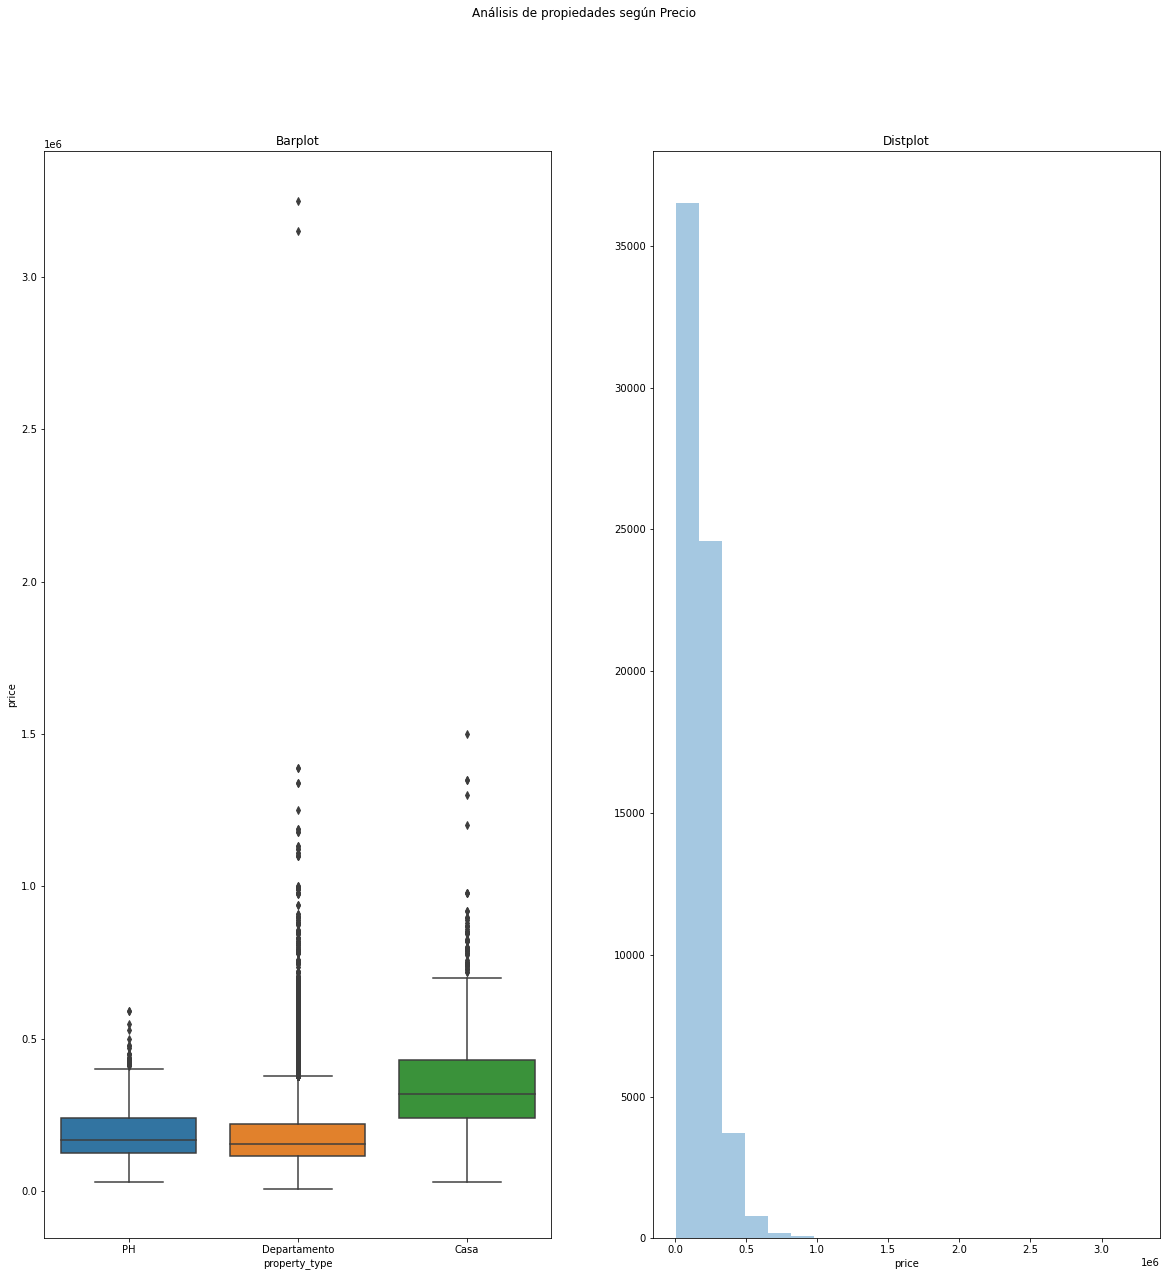

In [130]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según Precio')

sns.distplot(df_filtro_surface_covered['price'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
df_filtro_surface_covered['price'].value_counts(normalize=True)
sns.boxplot(data = df_filtro_surface_covered, y = "price", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Precio')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

In [133]:
df_filtro_price = df_filtro_surface_covered[ (((df_filtro_surface_covered.property_type == 'Casa') & (df_filtro_surface_covered.price < 700000))| ((df_filtro_surface_covered.property_type == 'PH') & (df_filtro_surface_covered.price < 410000))| ((df_filtro_surface_covered.property_type == 'Departamento') & (df_filtro_surface_total.price < 380000)) ) ]

<ipython-input-133-33d67fbdecf5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtro_price = df_filtro_surface_covered[ (((df_filtro_surface_covered.property_type == 'Casa') & (df_filtro_surface_covered.price < 700000))| ((df_filtro_surface_covered.property_type == 'PH') & (df_filtro_surface_covered.price < 410000))| ((df_filtro_surface_covered.property_type == 'Departamento') & (df_filtro_surface_total.price < 380000)) ) ]


C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


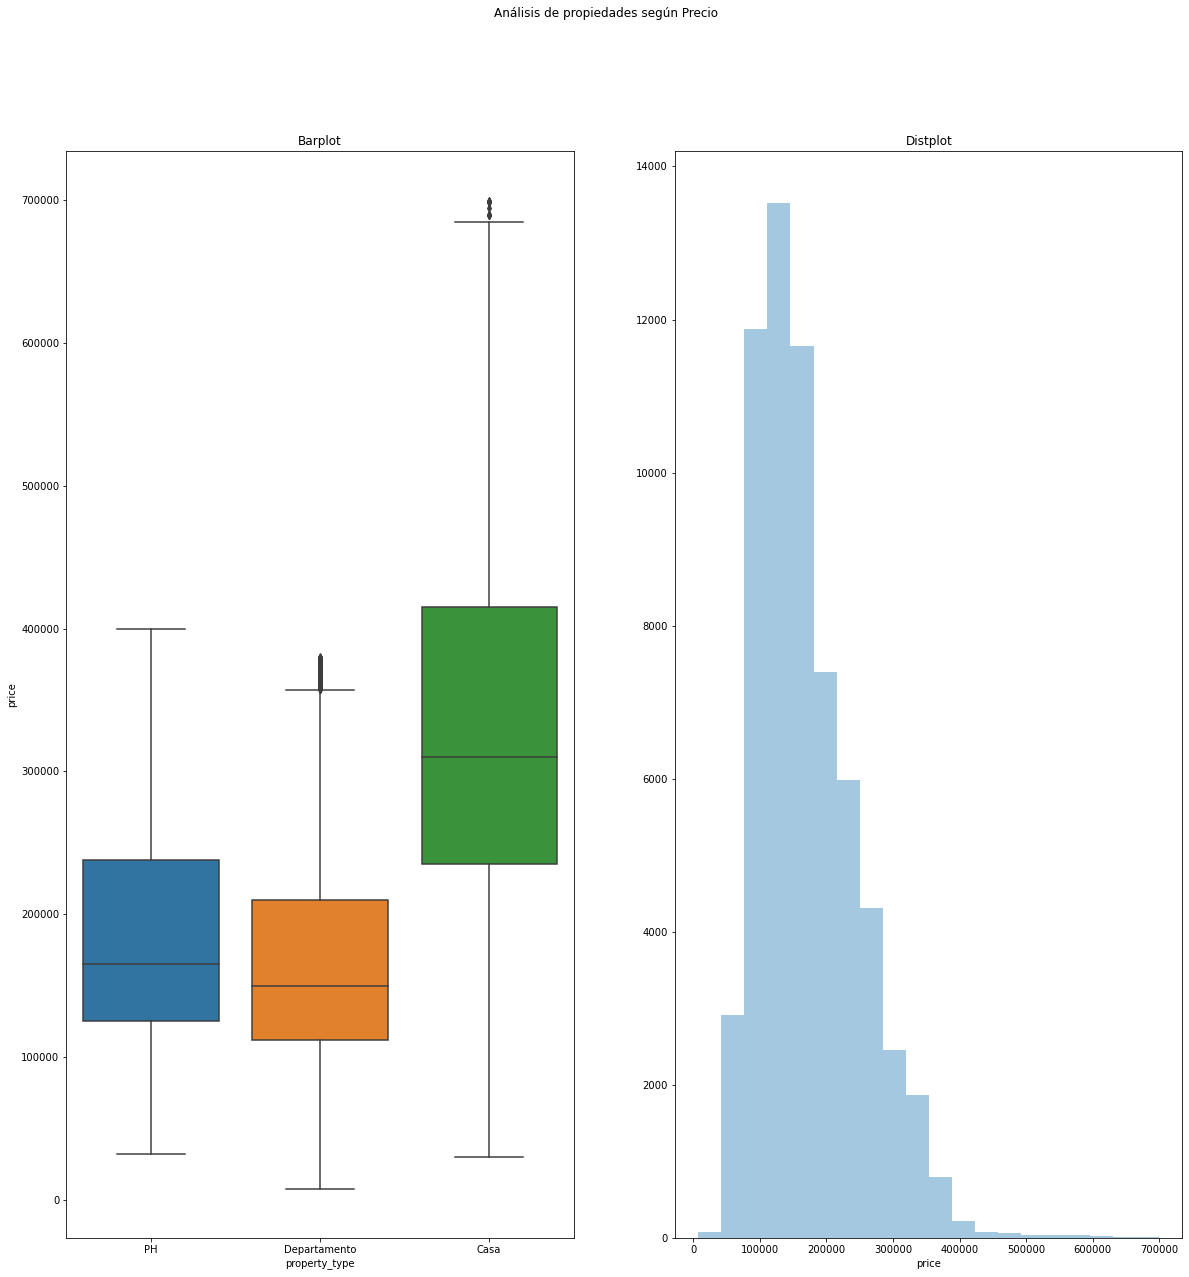

In [134]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según Precio')

sns.distplot(df_filtro_price['price'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
df_filtro_price['price'].value_counts(normalize=True)
sns.boxplot(data = df_filtro_price, y = "price", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Precio')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

## En este punto consideramos que el dataset se ha depurado de manera satisfactoria tomando en cuenta su Precio

In [135]:
df_filtro_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63470 entries, 1 to 146550
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_date       63470 non-null  object 
 1   end_date         63470 non-null  object 
 2   created_on       63470 non-null  object 
 3   lat              60679 non-null  float64
 4   lon              60679 non-null  float64
 5   l1               63470 non-null  object 
 6   l2               63470 non-null  object 
 7   l3               63470 non-null  object 
 8   rooms            63470 non-null  float64
 9   bedrooms         63470 non-null  float64
 10  bathrooms        63470 non-null  float64
 11  surface_total    63470 non-null  float64
 12  surface_covered  63470 non-null  float64
 13  price            63470 non-null  float64
 14  currency         63470 non-null  object 
 15  title            63470 non-null  object 
 16  description      63470 non-null  object 
 17  property_ty

In [136]:
df_filtro_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63470 entries, 1 to 146550
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_date       63470 non-null  object 
 1   end_date         63470 non-null  object 
 2   created_on       63470 non-null  object 
 3   lat              60679 non-null  float64
 4   lon              60679 non-null  float64
 5   l1               63470 non-null  object 
 6   l2               63470 non-null  object 
 7   l3               63470 non-null  object 
 8   rooms            63470 non-null  float64
 9   bedrooms         63470 non-null  float64
 10  bathrooms        63470 non-null  float64
 11  surface_total    63470 non-null  float64
 12  surface_covered  63470 non-null  float64
 13  price            63470 non-null  float64
 14  currency         63470 non-null  object 
 15  title            63470 non-null  object 
 16  description      63470 non-null  object 
 17  property_ty

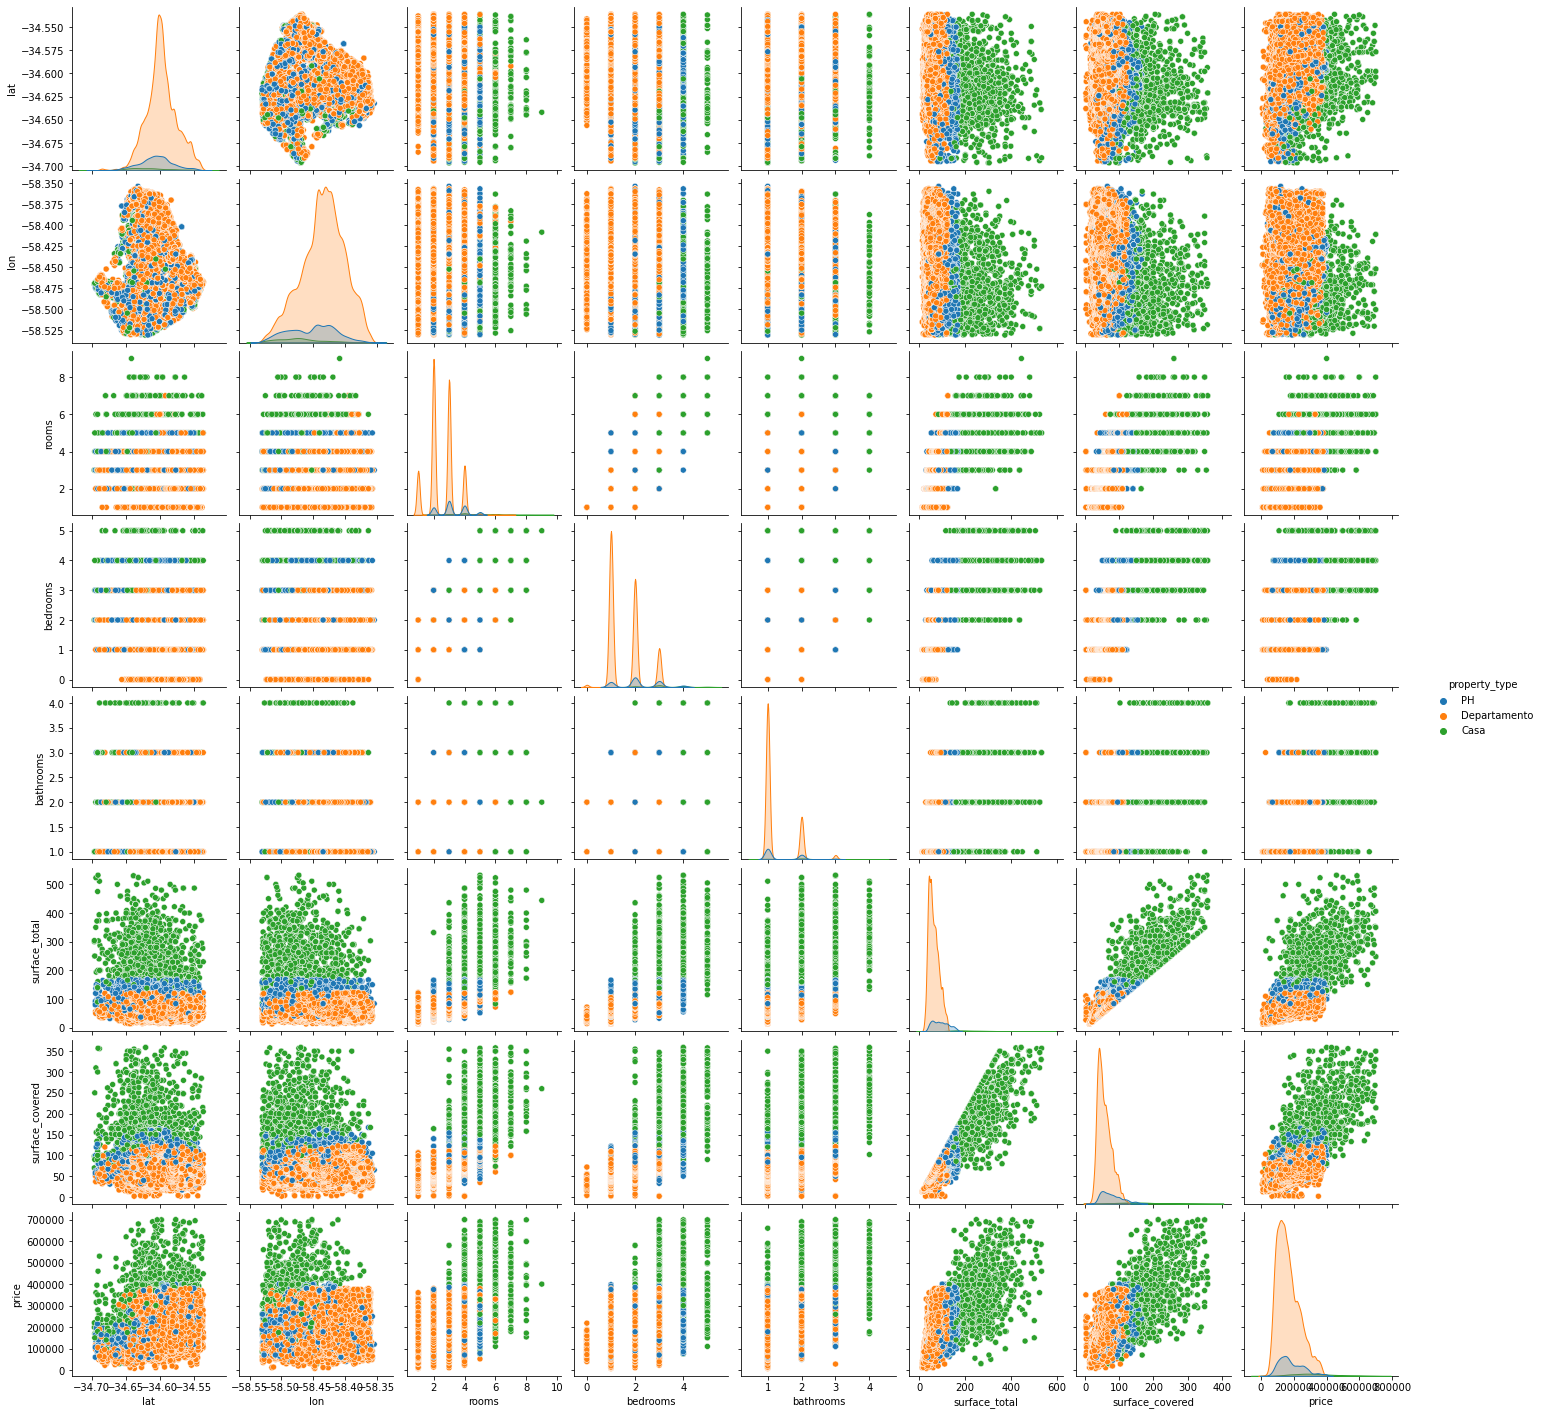

In [139]:
sns.pairplot(df_filtro_price, hue= 'property_type')

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [140]:
df_filtro_price.corr() # Aqui vemos la correlación entre las variables del Data Frame depurado

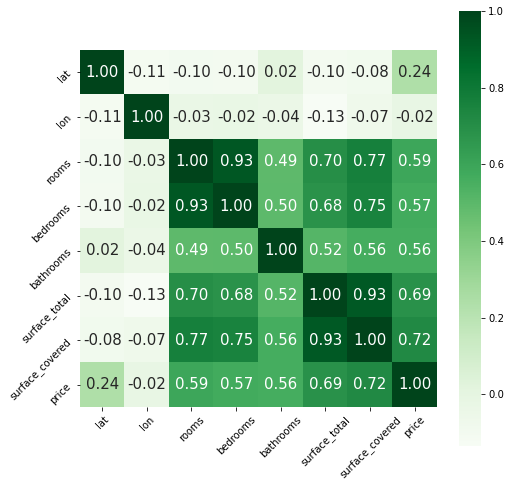

In [171]:
corr = df_filtro_price.drop(columns = ['start_date','end_date','created_on','l1','l2','l3','currency','title','description','property_type','operation_type']).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_filtro_price.drop(columns = ['start_date','end_date','created_on','l1','l2','l3','currency','title','description','property_type','operation_type']).columns, 
           yticklabels= df_filtro_price.drop(columns = ['start_date','end_date','created_on','l1','l2','l3','currency','title','description','property_type','operation_type']).columns,
           cmap= 'Greens')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

## Podemos observar que el Precio de la propiedad tiene una correlación fuerte con la superficie cubierta y la superficie total, luego tambien hay cierta correlación significativa con la cantidad de baños, habitaciones y ambientes.

In [142]:
df_filtro_price_Casa = df_filtro_price[(df_filtro_price.property_type == 'Casa')]

In [144]:
df_filtro_price_PH = df_filtro_price[(df_filtro_price.property_type == 'PH')]

In [145]:
df_filtro_price_Departamento = df_filtro_price[(df_filtro_price.property_type == 'Departamento')]

In [165]:
df_filtro_price_Casa.corr() # Aqui vemos la correlación entre las variables del Data Frame depurado para el tipo de propiedad Casa

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.113339,0.045742,0.010682,0.075846,-0.073671,0.007194,0.413515
lon,-0.113339,1.000000,0.080867,0.061434,0.026867,0.000361,0.028887,-0.065832
rooms,0.045742,0.080867,1.000000,0.782942,0.398523,0.430062,0.533197,0.408092
bedrooms,0.010682,0.061434,0.782942,1.000000,0.440080,0.436688,0.531682,0.394503
bathrooms,0.075846,0.026867,0.398523,0.440080,1.000000,0.412157,0.507550,0.468895
surface_total,-0.073671,0.000361,0.430062,0.436688,0.412157,1.000000,0.813645,0.555280
surface_covered,0.007194,0.028887,0.533197,0.531682,0.507550,0.813645,1.000000,0.618995
price,0.413515,-0.065832,0.408092,0.394503,0.468895,0.555280,0.618995,1.000000


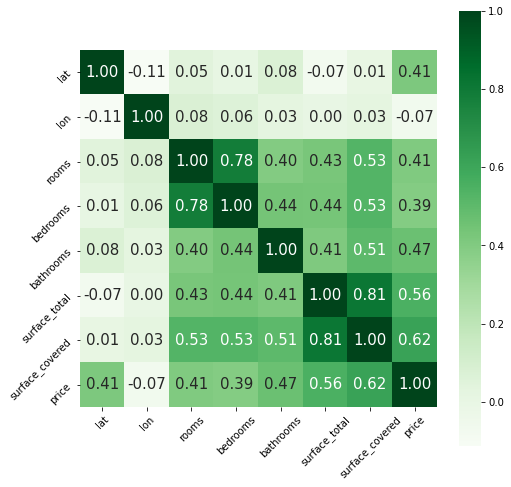

In [166]:
corr = df_filtro_price_Casa.drop(columns = ['start_date','end_date','created_on','l1','l2','l3','currency','title','description','property_type','operation_type']).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_filtro_price_Casa.drop(columns = ['start_date','end_date','created_on','l1','l2','l3','currency','title','description','property_type','operation_type']).columns, 
           yticklabels= df_filtro_price_Casa.drop(columns = ['start_date','end_date','created_on','l1','l2','l3','currency','title','description','property_type','operation_type']).columns,
           cmap= 'Greens')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [168]:
df_filtro_price_PH.corr() # Aqui vemos la correlación entre las variables del Data Frame depurado para el tipo de propiedad PH

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.020658,-0.055332,-0.065871,0.033432,-0.073213,-0.019917,0.304897
lon,-0.020658,1.000000,0.104197,0.111620,0.019917,-0.099148,0.090633,0.074024
rooms,-0.055332,0.104197,1.000000,0.950120,0.448349,0.661554,0.735422,0.582376
bedrooms,-0.065871,0.111620,0.950120,1.000000,0.438921,0.637583,0.731215,0.574506
bathrooms,0.033432,0.019917,0.448349,0.438921,1.000000,0.458906,0.540316,0.498010
surface_total,-0.073213,-0.099148,0.661554,0.637583,0.458906,1.000000,0.820376,0.640316
surface_covered,-0.019917,0.090633,0.735422,0.731215,0.540316,0.820376,1.000000,0.706309
price,0.304897,0.074024,0.582376,0.574506,0.498010,0.640316,0.706309,1.000000


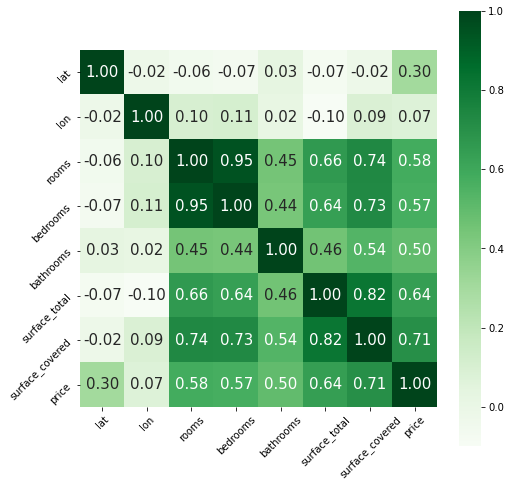

In [167]:
corr = df_filtro_price_PH.drop(columns = ['start_date','end_date','created_on','l1','l2','l3','currency','title','description','property_type','operation_type']).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_filtro_price_PH.drop(columns = ['start_date','end_date','created_on','l1','l2','l3','currency','title','description','property_type','operation_type']).columns, 
           yticklabels= df_filtro_price_PH.drop(columns = ['start_date','end_date','created_on','l1','l2','l3','currency','title','description','property_type','operation_type']).columns,
           cmap= 'Greens')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [170]:
df_filtro_price_Departamento.corr() # Aqui vemos la correlación entre las variables del Data Frame depurado para el tipo de propiedad Departamento

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.170329,-0.037606,-0.046473,0.060412,0.030508,0.012854,0.299830
lon,-0.170329,1.000000,0.055752,0.059617,0.010978,0.033039,0.082009,0.056679
rooms,-0.037606,0.055752,1.000000,0.922500,0.453886,0.757197,0.799204,0.551141
bedrooms,-0.046473,0.059617,0.922500,1.000000,0.463181,0.743577,0.789293,0.530188
bathrooms,0.060412,0.010978,0.453886,0.463181,1.000000,0.552842,0.558953,0.533689
surface_total,0.030508,0.033039,0.757197,0.743577,0.552842,1.000000,0.937643,0.748191
surface_covered,0.012854,0.082009,0.799204,0.789293,0.558953,0.937643,1.000000,0.728197
price,0.299830,0.056679,0.551141,0.530188,0.533689,0.748191,0.728197,1.000000


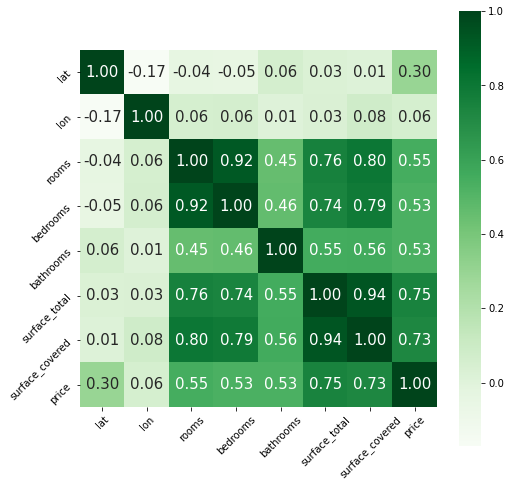

In [169]:
corr = df_filtro_price_Departamento.drop(columns = ['start_date','end_date','created_on','l1','l2','l3','currency','title','description','property_type','operation_type']).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_filtro_price_Departamento.drop(columns = ['start_date','end_date','created_on','l1','l2','l3','currency','title','description','property_type','operation_type']).columns, 
           yticklabels= df_filtro_price_Departamento.drop(columns = ['start_date','end_date','created_on','l1','l2','l3','currency','title','description','property_type','operation_type']).columns,
           cmap= 'Greens')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

## Podemos observar que para el caso de los departamentos, la correlación con las variables es más fuerte, luego para los PH y en menor medida las casas. 

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


## Como hemos podido apreciar, una variable interesante para conocer el precio de una propiedad, es la superficie total y la superficie cubierta, por lo cual se puede considerar de interes tener el precio por metro cuadra de cada propiedad, con ello buscar las 5 propiedades mas lujosas o caras por metro cuadrado, y que barrio las aloja. Tambien se podria tener una estimación del precio por metro cuadrado de cada barrio por ejemplo. Para este punto particular vamos a preguntar cual es el precio promedio del metro cuadrado cubierto en capital federal, y la distribución.

In [172]:
df_filtrado = df_filtro_price

In [173]:
df_filtrado[['price_m2']] = df_filtrado.price/df_filtrado.surface_total
df_filtrado.head()

C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\pandas\core\indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-173-f9c5fa9ba938>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[['price_m2']] = df_filtrado.price/df_filtrado.surface_total
C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,price_m2
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,2271.428571
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,2777.777778
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,3470.588235
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta,2678.571429
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta,2278.571429


In [174]:
df_filtrado[['price_m2']].describe()

,price_m2
count,63470.000000
mean,2615.097891
std,773.219525
min,111.940299
25%,2112.349599
50%,2550.000000
75%,3046.875000
max,11000.000000


In [175]:
df_filtrado_Casa = df_filtrado[(df_filtrado.property_type == 'Casa')]
df_filtrado_PH = df_filtrado[(df_filtrado.property_type == 'PH')]
df_filtrado_Departamento = df_filtrado[(df_filtrado.property_type == 'Departamento')]

C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


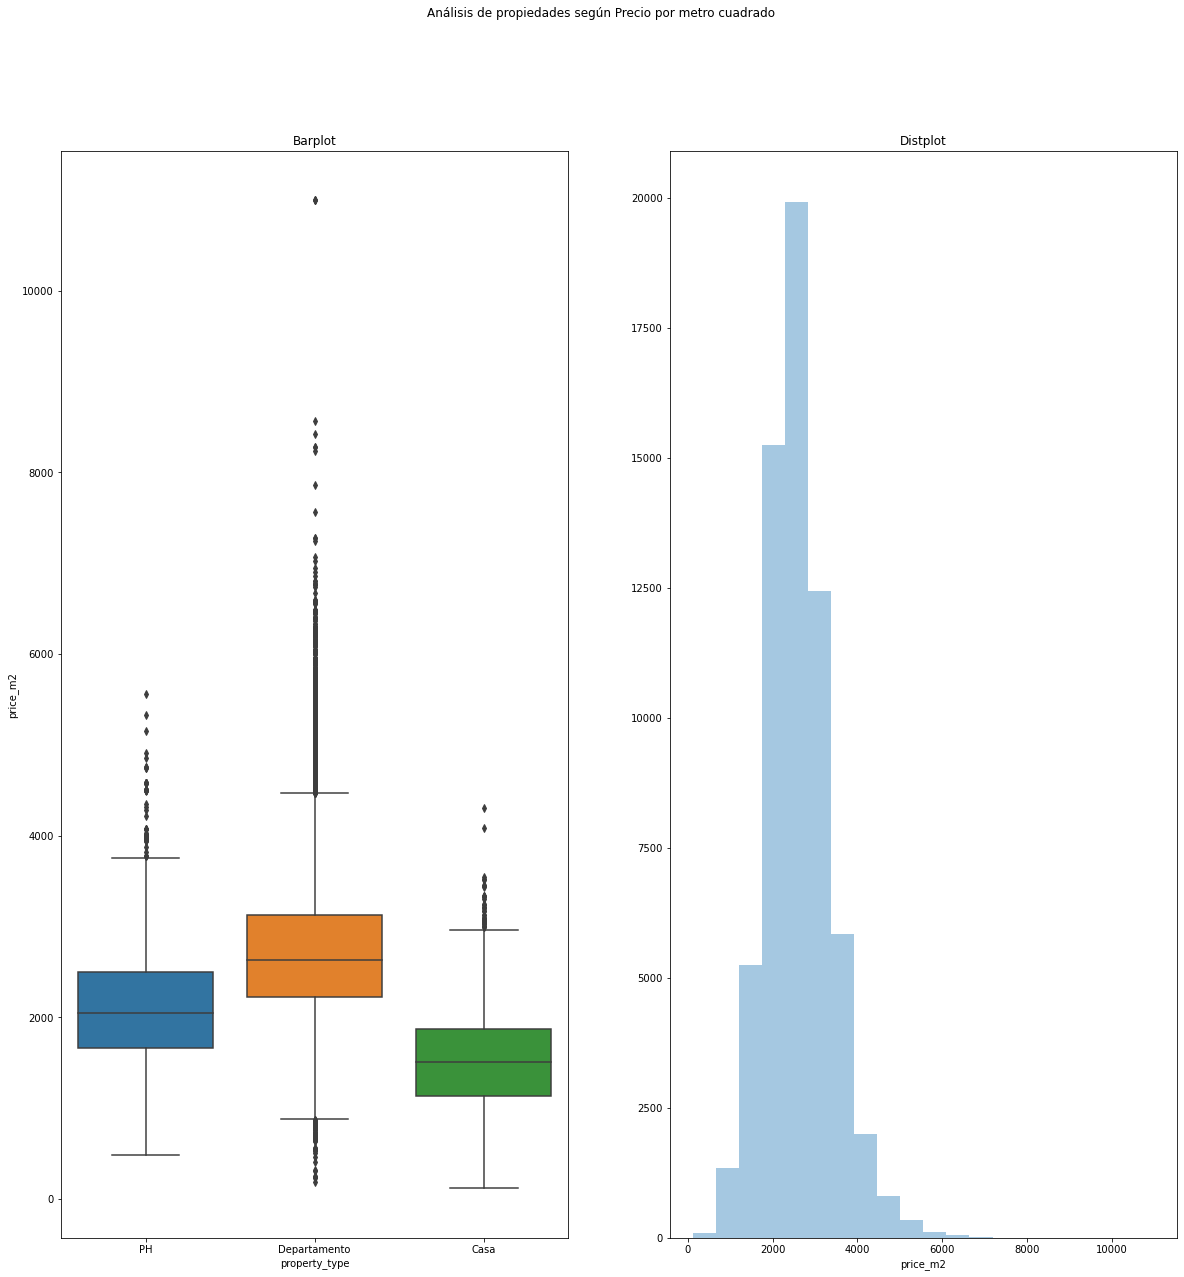

In [176]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según Precio por metro cuadrado')

sns.distplot(df_filtrado['price_m2'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
df_filtrado['price_m2'].value_counts(normalize=True)
sns.boxplot(data = df_filtrado, y = "price_m2", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Precio')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

## En el gráfico anterior podemos sacar algunas conclusiones, tales como que el precio por metro cuadrado de los Departamento suele ser mayor que al otro tipo de propiedades, y podemos sacar algunos valores promedio si fuera necesario

In [177]:
df_filtrado.reset_index(inplace = True)
df_filtrado

,index,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,...,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,price_m2
0,1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,...,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,2271.428571
1,2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,...,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,2777.777778
2,3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,...,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,3470.588235
3,5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,...,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta,2678.571429
4,6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,...,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta,2278.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63465,146540,2019-07-31,2019-08-14,2019-07-31,-34.581699,-58.433547,Argentina,Capital Federal,Palermo,4.0,...,2.0,83.0,80.0,215000.0,USD,Departamento semipiso en 4 ambientes Palermo C...,"Muy buen departamento en Palermo-Hollywood, a ...",Departamento,Venta,2590.361446
63466,146542,2019-07-31,2020-01-17,2019-07-31,-34.578688,-58.435533,Argentina,Capital Federal,Palermo,2.0,...,1.0,80.0,80.0,170000.0,USD,A extrenar departamento en venta en Palermo,Simpático departamento a estrenar en Palermo H...,Departamento,Venta,2125.000000
63467,146543,2019-07-31,2019-08-14,2019-07-31,-34.581699,-58.433547,Argentina,Capital Federal,Palermo,3.0,...,2.0,85.0,81.0,225000.0,USD,Duplex 2 dormitorios super luminoso y amplio !,Para visitarlo contactar a Marta Cell: 0116153...,Departamento,Venta,2647.058824
63468,146549,2019-07-31,2019-10-12,2019-07-31,-34.576573,-58.434394,Argentina,Capital Federal,Palermo,3.0,...,1.0,84.0,84.0,178000.0,USD,Hermoso PH de 3 ambientes al frente muy lumisoso,Hermoso PH ubicado en el primer piso.al frente...,PH,Venta,2119.047619


In [179]:
df_filtrado.sort_values(by = 'price_m2', ascending=False  ).head()

,index,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,...,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,price_m2
16593,34014,2019-04-11,2019-06-08,2019-04-11,-34.586709,-58.409322,Argentina,Capital Federal,Recoleta,1.0,...,1.0,30.0,30.0,330000.0,USD,Inversión. 3 Monoambientes. Excelente estado. ...,CARACTERÍSTICAS- Superficies: 30 m².- 3 Depart...,Departamento,Venta,11000.000000
16587,34008,2019-04-11,2019-06-08,2019-04-11,-34.588555,-58.409944,Argentina,Capital Federal,Palermo,1.0,...,1.0,30.0,30.0,330000.0,USD,Inversión. 3 Monoambientes. Excelente estado. ...,CARACTERÍSTICAS- Superficies: 30 m².- 3 Depart...,Departamento,Venta,11000.000000
16597,34019,2019-04-11,2019-06-08,2019-04-11,-34.590772,-58.411661,Argentina,Capital Federal,Barrio Norte,1.0,...,1.0,30.0,30.0,330000.0,USD,Inversión. 3 Monoambientes. Excelente estado. ...,CARACTERÍSTICAS- Superficies: 30 m².- 3 Depart...,Departamento,Venta,11000.000000
59625,136611,2019-07-31,2020-01-17,2019-07-31,NaN,NaN,Argentina,Capital Federal,Puerto Madero,1.0,...,1.0,42.0,42.0,360000.0,USD,SLS Studios,"SLS Designer Suites, ubicadas en el centro del...",Departamento,Venta,8571.428571
49132,110028,2020-01-24,2020-02-13,2020-01-24,-34.593409,-58.428618,Argentina,Capital Federal,Palermo,1.0,...,1.0,38.0,35.0,320000.0,USD,Av Scalabrini Ortiz 1351 - Divino 3 ambientes ...,Divino Departamento de 3 ambientes Todo Luz!! ...,Departamento,Venta,8421.052632


## En la lista anterior podemos ver las 5 propiedades más caras en función al precio por metro cuadrado, las 3 primeras con un precio por metro cuadrado de 11.000 dolares

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [198]:
properati = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
dfAb = properati[(properati.l2 == "Capital Federal")  & ((properati.property_type == "Departamento") | (properati.property_type == "Casa") | (properati.property_type == "PH"))] # Filtramos las instancias que cumplen con ser las 3 clases más abundantes respecto al tipo de propiedad, en la región con mayor cantidad de propiedades publicadas
dfAb = dfAb[(dfAb.surface_total <= 1000) & (dfAb.surface_total >= 15)]
dfAb = dfAb[(dfAb.price <= 4000000)]
dfAb.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


In [199]:
# Eliminar columnas PassengerId, Name, Cabin, la columna ticket no la vamos a eliminar todavia.
dfAb.drop(['start_date','end_date','created_on','lat','lon','l1','l2','l3', 'currency','title','description','property_type','operation_type'],axis=1, inplace=True)

In [200]:
dfAb.dropna(inplace=True)
dfAb.shape
#dfAb.head()
dfAb.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925604,0.601887,0.725799,0.304407,0.479972
bedrooms,0.925604,1.000000,0.605002,0.695523,0.291140,0.442418
bathrooms,0.601887,0.605002,1.000000,0.651924,0.275936,0.638737
surface_total,0.725799,0.695523,0.651924,1.000000,0.375749,0.686459
surface_covered,0.304407,0.291140,0.275936,0.375749,1.000000,0.298212
price,0.479972,0.442418,0.638737,0.686459,0.298212,1.000000


In [201]:
#Seleccionamos las variables predictoras (X) y la variable a predecir (y).
X = dfAb[['surface_total', 'rooms']]
type(X)
y = dfAb['price']
print(X,y)

        surface_total  rooms
0               140.0    7.0
1                70.0    2.0
2                45.0    2.0
3                85.0    2.0
5                56.0    2.0
...               ...    ...
146554          175.0    4.0
146555          144.0    3.0
146556          317.0    4.0
146557          145.0    3.0
146558          220.0    4.0

[81019 rows x 2 columns] 0          153000.0
1          159000.0
2          125000.0
3          295000.0
5          150000.0
            ...    
146554     570000.0
146555     480000.0
146556     530000.0
146557     420000.0
146558    1470000.0
Name: price, Length: 81019, dtype: float64


In [202]:
#Realizamos un Train/Test split de los datos.
X_train = pd.DataFrame()
X_test = pd.DataFrame()
y_train = pd.DataFrame()
y_test = pd.DataFrame()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [203]:
#Definimos los modelos y entrenamos
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [204]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [205]:
print(linear_model.coef_, linear_model.intercept_)

[ 2736.15757659 -8568.25305897] 28747.50508517059


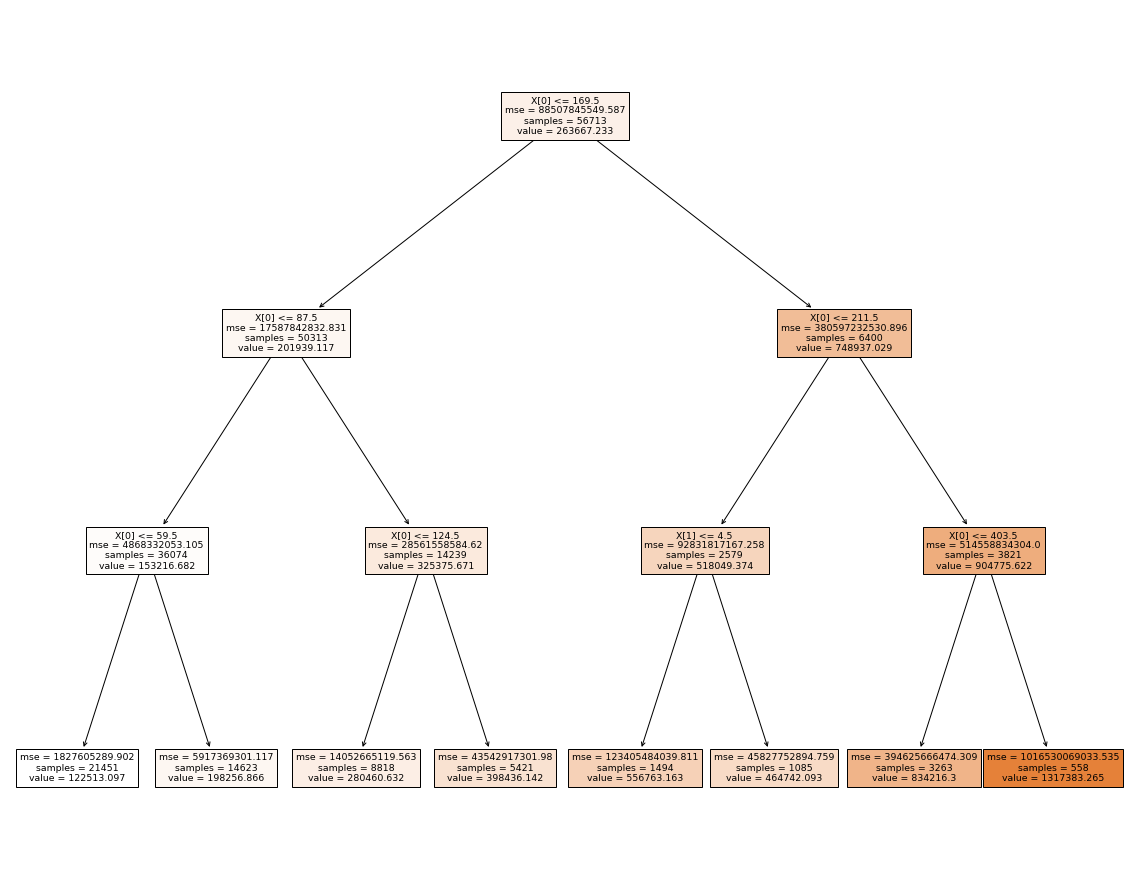

In [206]:
from sklearn import tree
if tree_regressor.max_depth < 4:
    plt.figure(figsize = (20,16))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 213068.79528015488
Raíz del error cuadrático medio en Test: 216990.75433826866
Raíz del error medio absoluto en Train: 98684.52833273233
Raíz del error medio absoluto en Test: 99818.98879852808


C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


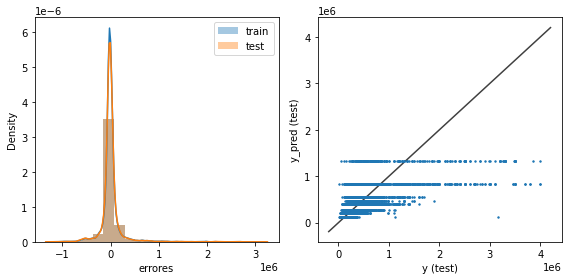

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 175578.71480841053
Raíz del error cuadrático medio en Test: 200748.996798283
Raíz del error medio absoluto en Train: 82961.92008886852
Raíz del error medio absoluto en Test: 89906.87729778657


C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


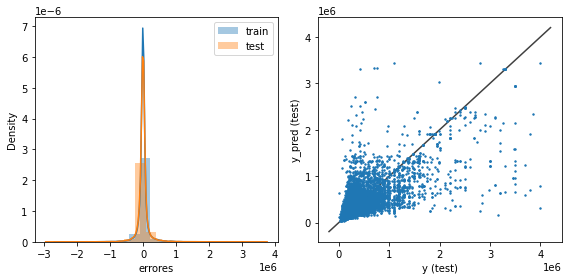

In [207]:
#Evaluamos los modelos obtenidos. Para ello, evaluamos la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
modelos = [ 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print(f'Raíz del error medio absoluto en Train: {mae_train}')
    print(f'Raíz del error medio absoluto en Test: {mae_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

In [208]:
#Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.

In [220]:
# Definimos las listas vacias para los valores de accuracy deseados
from sklearn.metrics import mean_squared_error
lista_rmse_train = []
lista_rmse_test = []
lista_mae_train = []
lista_mae_test = []
# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
   
    
   
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
   
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)
    lista_mae_train.append(mae_train)
    lista_mae_test.append(mae_test)

Text(0, 0.5, 'RMSE')

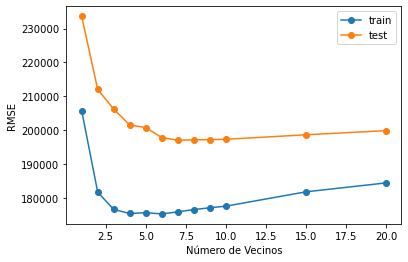

In [222]:
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('RMSE')

Text(0, 0.5, 'MAE')

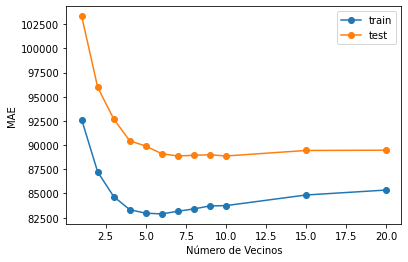

In [223]:
plt.plot(k_vecinos,lista_mae_train,'o-',label='train' )
plt.plot(k_vecinos,lista_mae_test,'o-',label='test')
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('MAE')

## Vemos que el mejor desempeño se obtiene con 6 vecinos, obteniendo los valores mas bajo de RMSE, cercano a los 170.000 para train y 200000 para test, y de MAE cercano a los 83.000 para train y 90.000 para test

In [224]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_rmse_train = []
lista_rmse_test = []
lista_mae_train = []
lista_mae_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,20,30,40,50]

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    clf = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    
    # Agregar la información a las listas
    lista_rmse_train.append(train_acc)
    lista_rmse_test.append(test_acc)
    lista_mae_train.append(mae_train)
    lista_mae_test.append(mae_test)

Text(0, 0.5, 'RMSE')

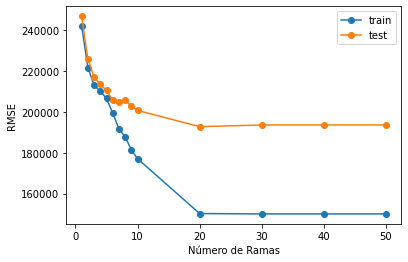

In [225]:
plt.plot(max_depths,lista_rmse_train,'o-',label='train' )
plt.plot(max_depths,lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('Número de Ramas')
plt.ylabel('RMSE')

Text(0, 0.5, 'MAE')

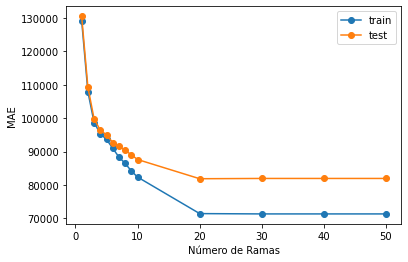

In [226]:
plt.plot(max_depths,lista_mae_train,'o-',label='train' )
plt.plot(max_depths,lista_mae_test,'o-',label='test')
plt.legend()
plt.xlabel('Número de Ramas')
plt.ylabel('MAE')

## Vemos que el mejor desempeño se obtiene con 20 Ramas, obteniendo los valores mas bajo de RMSE, cercano a los 140.000 para train y 200000 para test,y de MAE cercano a los 70.000 para train y 80.000 para test

## Podemos concluir que el mejor modelo, tomando como criterio a aquél que meno MAE nos devuelve, es el del arbol de decisión con 20 ramas.